# **GOAL**
**다음 분기에 어떤 게임을 설계해야할까?**
비데이터 직군의 청자에게 데이터를 기반으로 위의 주제에 대해 설명하는 영상제출



---


**Misision**
>- **지역에 따라서 선호하는 게임 장르는 다를까?**라는 질문에 대답
>- **연도별 게임의 트렌드가 있을까?** 라는 질문에 대답
>- **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**가 포함



# Env

In [1]:
# Env
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.style.use("default")
from IPython.display import Image
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm import tqdm

# Data Load

In [2]:
df = pd.read_csv('C:/Users/82104/Desktop/vgames2.csv')
display(df.isnull().sum())
display(df[df['Year'].isnull()].head(5))
display(df[df['Genre'].isnull()].head(5))
display(df[df['Publisher'].isnull()].head(5))
print(f"Num of NaN : {len(df[ (df.Year.isnull()) | df.Genre.isnull() | df.Publisher.isnull()  ])}")
df1 = df.dropna()
display(df.shape)
display(df1.shape)
df1

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,1880,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0


Num of NaN : 357


(16598, 10)

(16241, 10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# Data Preprocessing

In [3]:
# NA_Sales에 k라는 단위 있음 --> 1000으로 변경
# EU_Sales에도 m이라는 단위가 있음
# JP_Sales에도 k라는 단위 존재
# Other_Sales또한,,
# ===> 정규표현식을 이용하자 ======
change_list = ['m','K','k','M']
na_sale = df1[df1['NA_Sales'].str.contains('|'.join(change_list))]
eu_sale = df1[df1['EU_Sales'].str.contains('|'.join(change_list))]
jp_sale = df1[df1['JP_Sales'].str.contains('|'.join(change_list))]
other_sale = df1[df1['Other_Sales'].str.contains('|'.join(change_list))]
display(na_sale)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
447,448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,459,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,578,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,626,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,673,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
767,768,PDC World Championship Darts 2009,Wii,2009.0,Sports,Oxygen Interactive,0M,0.02,0,0
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0


## Sales 품목 - 단위 혼합 문제

In [4]:
%%time
def change_unit(data,col):
    data['num'] = data[col].str.extract(r'(\d+.\d+|\d+)')
    data['metric'] = data[col].str.extract(r'([A-Z]+)')
    data['metric'] = data['metric'].replace('K','1000').replace('M','1000000')
    data = data.astype({'num':'float','metric':'int'})
    data['real_'+col] = (data['num']*data['metric']).astype(int)
    return data

NA = change_unit(na_sale,'NA_Sales')
EU = change_unit(eu_sale,'EU_Sales')
JP = change_unit(jp_sale,'JP_Sales')
OT = change_unit(other_sale,'Other_Sales')

df1.loc[na_sale.index,'NA_Sales'] = NA.real_NA_Sales
df1.loc[eu_sale.index,'EU_Sales'] = EU.real_EU_Sales
df1.loc[jp_sale.index,'JP_Sales'] = JP.real_JP_Sales
df1.loc[other_sale.index,'Other_Sales'] = OT.real_Other_Sales
#display(df1.loc[na_sale.index])
# data type 변경
df1 = df1.astype({'Name':'str', 'Year':'int' , 'Genre':'str', 'Publisher':'str',
                  'NA_Sales':'float','EU_Sales':'float','JP_Sales':'float','Other_Sales':'float'})
df1 = df1[['Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df1

Wall time: 51.1 ms


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## Year에 결측치 제거

In [5]:
display(df1.sort_values(by='Year',ascending = True).head(101))
df2 = df1[df1.Year>1000]
print(f" year 전처리 전 : {df1.shape}, year 전처리 후 : {df2.shape}")
feat = df2.columns

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0.00,0.00,0.20,0.00
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00
14666,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01
2249,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0.00,0.09
8681,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.60,0.00,0.20
11163,Momotarou Dentetsu 11,GC,2,Misc,Hudson Soft,0.00,0.00,0.07,0.00
15612,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0.00,0.02
8144,ESPN NFL Primetime 2002,XB,2,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00
8912,Mega Man Network Transmission,GC,3,Platform,Capcom,0.13,0.03,0.00,0.00
8509,SimCity 4,PC,3,Simulation,Electronic Arts,0.01,0.24,0.00,0.05


 year 전처리 전 : (16241, 9), year 전처리 후 : (16141, 9)


## Platform 이름 확인

In [6]:
df2['Platform_cha'] = df2['Platform'].str.extract(r'([A-Z]+)')
df2 = df2.astype({'Platform_cha':'str'})
df2[df2['Platform_cha'] == 'nan']
platform_2600 = df2[df2['Platform_cha'] == 'nan'].index

<ipython-input-6-2c1bd2dd4b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Platform_cha'] = df2['Platform'].str.extract(r'([A-Z]+)')


2600이 결측치인 줄 알았으나 실존 모델이므로, 앞에 Atari 붙여주는 걸로


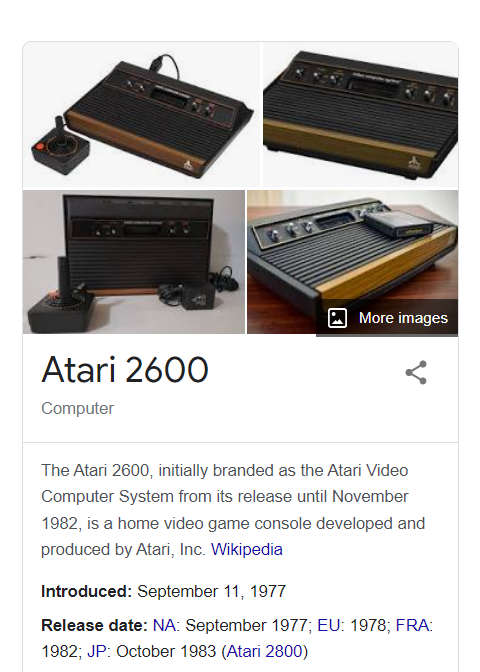

In [7]:
print('2600이 결측치인 줄 알았으나 실존 모델이므로, 앞에 Atari 붙여주는 걸로')
Image('C:/Users/82104/Desktop/Atari2600.png')

In [8]:
df2.loc[platform_2600,'Platform'] = 'Atari2600'
#display(df2.loc[platform_2600])
df2 = df2[feat]

## 필요 컬럼 생성

In [9]:
%%time
df2['Total_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']
df2['Generation'] = np.where( ((df2.Year >=1980)& (df2.Year <1990)), '1980',
                    np.where( ((df2.Year >=1990) & (df2.Year <2000)),'1990',
                    np.where( ((df2.Year >=2000) & (df2.Year <2010)),'2000',
                    np.where(  (df2.Year >=2010),'2010','error'))))
feature = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
idx_max = []
for i in tqdm(range(len(df2))):
    data = df2.iloc[i:i+1][feature].idxmax(axis=1).values[0]
    idx_max.append(data)

df2['Where'] = idx_max
df2.head(100)

100%|██████████| 16141/16141 [00:13<00:00, 1227.85it/s]

Wall time: 13.2 s


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Generation,Where
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000,NA_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000,NA_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010,JP_Sales
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010,NA_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010,NA_Sales
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14,2000,JP_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,2010,NA_Sales
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19,2000,JP_Sales
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04,2000,JP_Sales
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08,2010,NA_Sales


# Mission
>- **지역에 따라서 선호하는 게임 장르가 다를까?**
>- **연도별 게임의 트렌드가 있을까?**
>- **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

## M1 ) 지역에 따라서 선호하는 게임 장르가 다를까?

In [10]:
# 지역에 따른 groupby 확인
df_name = df2.groupby('Name').agg(횟수 = ('Name','count'),NA = ('NA_Sales','mean'),EU = ('EU_Sales','mean'),JP = ('JP_Sales','mean'),Other = ('Other_Sales','mean')).reset_index()
df_name['Total'] = df_name.NA + df_name.NA + df_name.EU + df_name.JP + df_name.Other
df_genre = df2.groupby('Genre').agg(NA = ('NA_Sales','mean'),EU = ('EU_Sales','mean'),JP = ('JP_Sales','mean'),Other = ('Other_Sales','mean')).reset_index()
df_year = df2.groupby('Year').agg(NA = ('NA_Sales','mean'),EU = ('EU_Sales','mean'),JP = ('JP_Sales','mean'),Other = ('Other_Sales','mean')).reset_index()
display(df_name.sort_values(by='Total', ascending = False).head(100))
display(df_genre)
display(df_year)

,Name,횟수,NA,EU,JP,Other,Total
3808,Halo: Reach,1,7.030000e+06,1.980000e+00,8.000000e-02,0.780000,1.406000e+07
5454,Mario Kart 64,1,5.550000e+06,1.940000e+00,2.230000e+00,0.150000,1.110000e+07
1628,Crash Team Racing,1,2.570000e+06,1.570000e+00,4.400000e-01,0.210000,5.140002e+06
9756,The Legend of Zelda: Ocarina of Time,2,2.050001e+06,1.580000e+00,1.035000e+00,0.230000,4.100005e+06
3623,Grand Theft Auto V,5,1.926003e+06,4.608000e+00,2.780000e-01,1.606000,3.852012e+06
1572,Cooking Mama 2: Dinner With Friends,1,1.610000e+06,1.500000e+00,1.000000e-01,0.390000,3.220002e+06
7180,Pokemon FireRed/Pokemon LeafGreen,1,4.340000e+00,2.650000e+00,3.150000e+06,0.350000,3.150012e+06
7216,Pokémon Yellow: Special Pikachu Edition,1,5.890000e+00,5.040000e+00,3.120000e+06,0.590000,3.120017e+06
9136,Super Mario Bros. 3,2,1.465005e+06,2.345000e+00,2.335000e+00,0.330000,2.930015e+06
3073,Final Fantasy IX,1,1.620000e+00,7.700000e-01,2.780000e+06,0.140000,2.780004e+06


,Genre,NA,EU,JP,Other
0,Action,6655.559358,2179.325942,446.421045,415.431587
1,Adventure,601.345388,150.366400,63.332049,221.531930
2,Fighting,1640.794632,1713.025694,1616.507901,603.179252
3,Misc,2447.869659,1687.734806,251.408312,275.327397
4,Platform,6035.187561,8809.470266,913.443272,554.971873
5,Puzzle,125.664749,734.856595,0.100699,89.627849
6,Racing,9884.484384,1687.536940,231.641969,347.457246
7,Role-Playing,1098.356541,1105.130199,8085.329080,1111.910151
8,Shooter,8778.043975,4826.735915,47.348013,583.675142
9,Simulation,3852.767895,1319.989976,1522.071558,83.271308


,Year,NA,EU,JP,Other
0,1980,1.266250,0.080000,0.000000,0.013750
1,1981,0.726087,2391.344565,0.000000,0.006957
2,1982,0.747778,0.045833,0.000000,0.008611
3,1983,0.456471,0.047059,0.476471,0.008235
4,1984,2.377143,0.150000,1.019286,0.050000
5,1985,32859.519286,0.338571,1.040000,0.065714
6,1986,0.625000,0.142000,0.938000,0.096500
7,1987,0.528750,0.088125,0.726875,0.012500
8,1988,1.591333,0.439333,1.050667,12666.720000
9,1989,3532.064118,0.496471,1.080000,0.088235


,Genre,NA,EU,JP,Other
0,Action,6655.559358,2179.325942,446.421045,415.431587
1,Adventure,601.345388,150.366400,63.332049,221.531930
2,Fighting,1640.794632,1713.025694,1616.507901,603.179252
3,Misc,2447.869659,1687.734806,251.408312,275.327397
4,Platform,6035.187561,8809.470266,913.443272,554.971873
5,Puzzle,125.664749,734.856595,0.100699,89.627849
6,Racing,9884.484384,1687.536940,231.641969,347.457246
7,Role-Playing,1098.356541,1105.130199,8085.329080,1111.910151
8,Shooter,8778.043975,4826.735915,47.348013,583.675142
9,Simulation,3852.767895,1319.989976,1522.071558,83.271308


,Genre,variable,value
0,Action,NA,6655.559358
1,Adventure,NA,601.345388
2,Fighting,NA,1640.794632
3,Misc,NA,2447.869659
4,Platform,NA,6035.187561


<AxesSubplot:xlabel='variable', ylabel='value'>

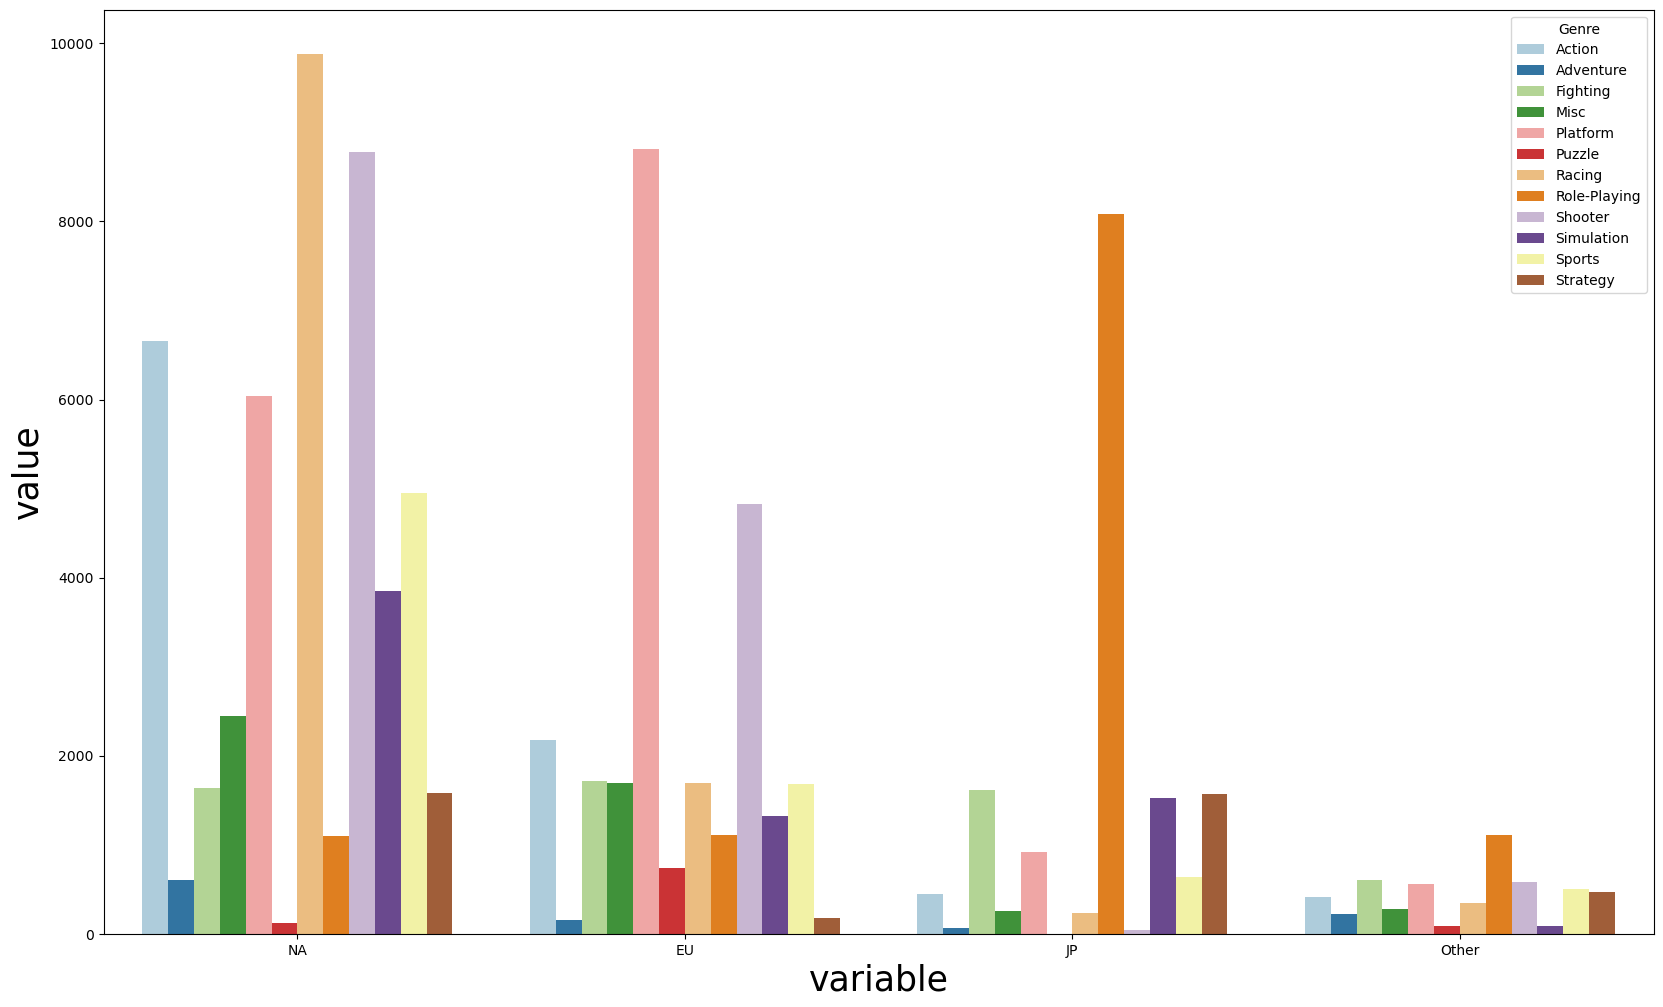

In [11]:
display(df_genre)
genre_melt = df_genre.melt(id_vars = 'Genre',value_vars = ['NA','EU','JP','Other'])
display(genre_melt.head(5))
# = = = = = = = ALL Visualization = = = = = = 
plt.figure(figsize = (20,12))
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 18}
plt.rcParams.update(parameters)

sns.barplot(data = genre_melt,x='variable',y='value',hue='Genre', palette = 'Paired')

Wall time: 470 ms


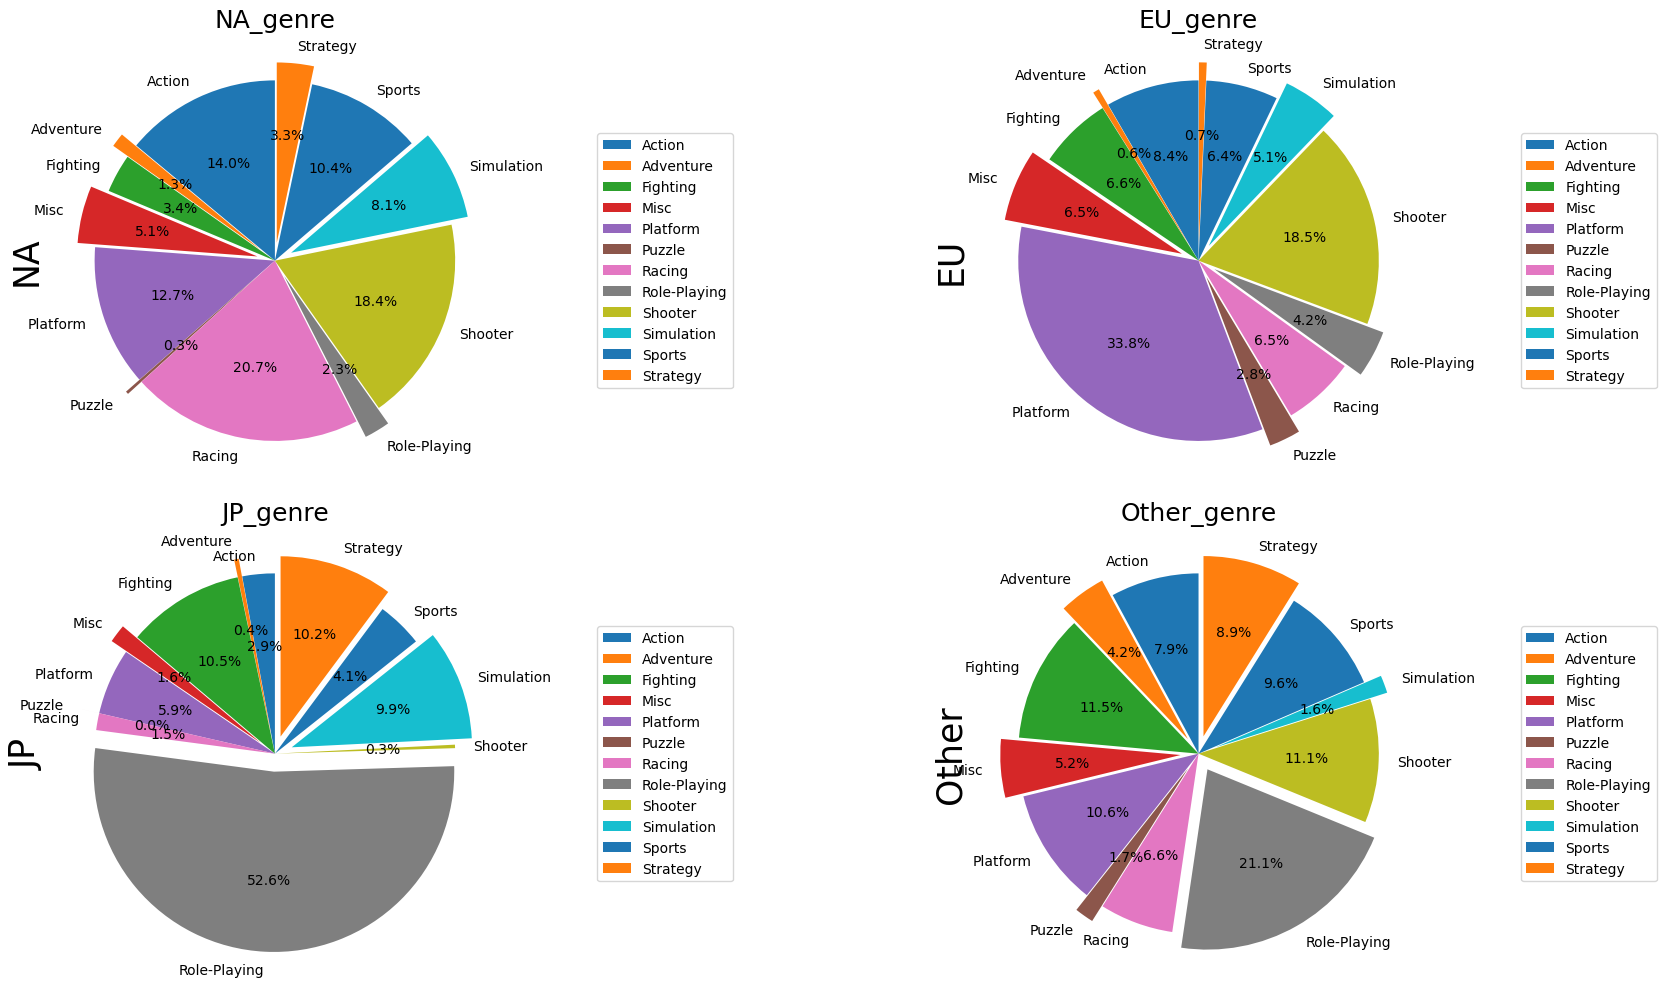

In [12]:
%%time
# 국가별로 쪼개서 보기
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
parameters = {'axes.labelsize': 12,
          'axes.titlesize': 18}
plt.rcParams.update(parameters)

label = list(df_genre.Genre)
exp = [0 , 0.1 , 0 , 0.1, 0 , 0.1 , 0 , 0.1, 0 , 0.1 , 0 , 0.1]
df_genre['NA'].plot(kind = 'pie', autopct='%1.1f%%',startangle=90 ,title = 'NA_genre', legend = True, ax = axes[0][0],explode = exp,labels = label)
df_genre['EU'].plot(kind = 'pie', autopct='%1.1f%%',startangle=90 ,title = 'EU_genre', legend = True, ax = axes[0][1],explode = exp,labels = label)
df_genre['JP'].plot(kind = 'pie', autopct='%1.1f%%',startangle=90 ,title = 'JP_genre', legend = True, ax = axes[1][0],explode = exp,labels = label)
df_genre['Other'].plot(kind = 'pie', autopct='%1.1f%%',startangle=90 ,title = 'Other_genre', legend = True, ax = axes[1][1],explode = exp,labels = label)
axes[0][0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
axes[0][1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
axes[1][0].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
axes[1][1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()

## 연도별 게임의 트렌드

,Year,NA,EU,JP,Other
0,1980,1.266250,0.080000,0.000000,0.013750
1,1981,0.726087,2391.344565,0.000000,0.006957
2,1982,0.747778,0.045833,0.000000,0.008611
3,1983,0.456471,0.047059,0.476471,0.008235
4,1984,2.377143,0.150000,1.019286,0.050000


,Year,variable,value
0,1980,NA,1.266250
1,1981,NA,0.726087
2,1982,NA,0.747778
3,1983,NA,0.456471
4,1984,NA,2.377143
5,1985,NA,32859.519286
6,1986,NA,0.625000
7,1987,NA,0.528750
8,1988,NA,1.591333
9,1989,NA,3532.064118


<AxesSubplot:xlabel='Year', ylabel='value'>

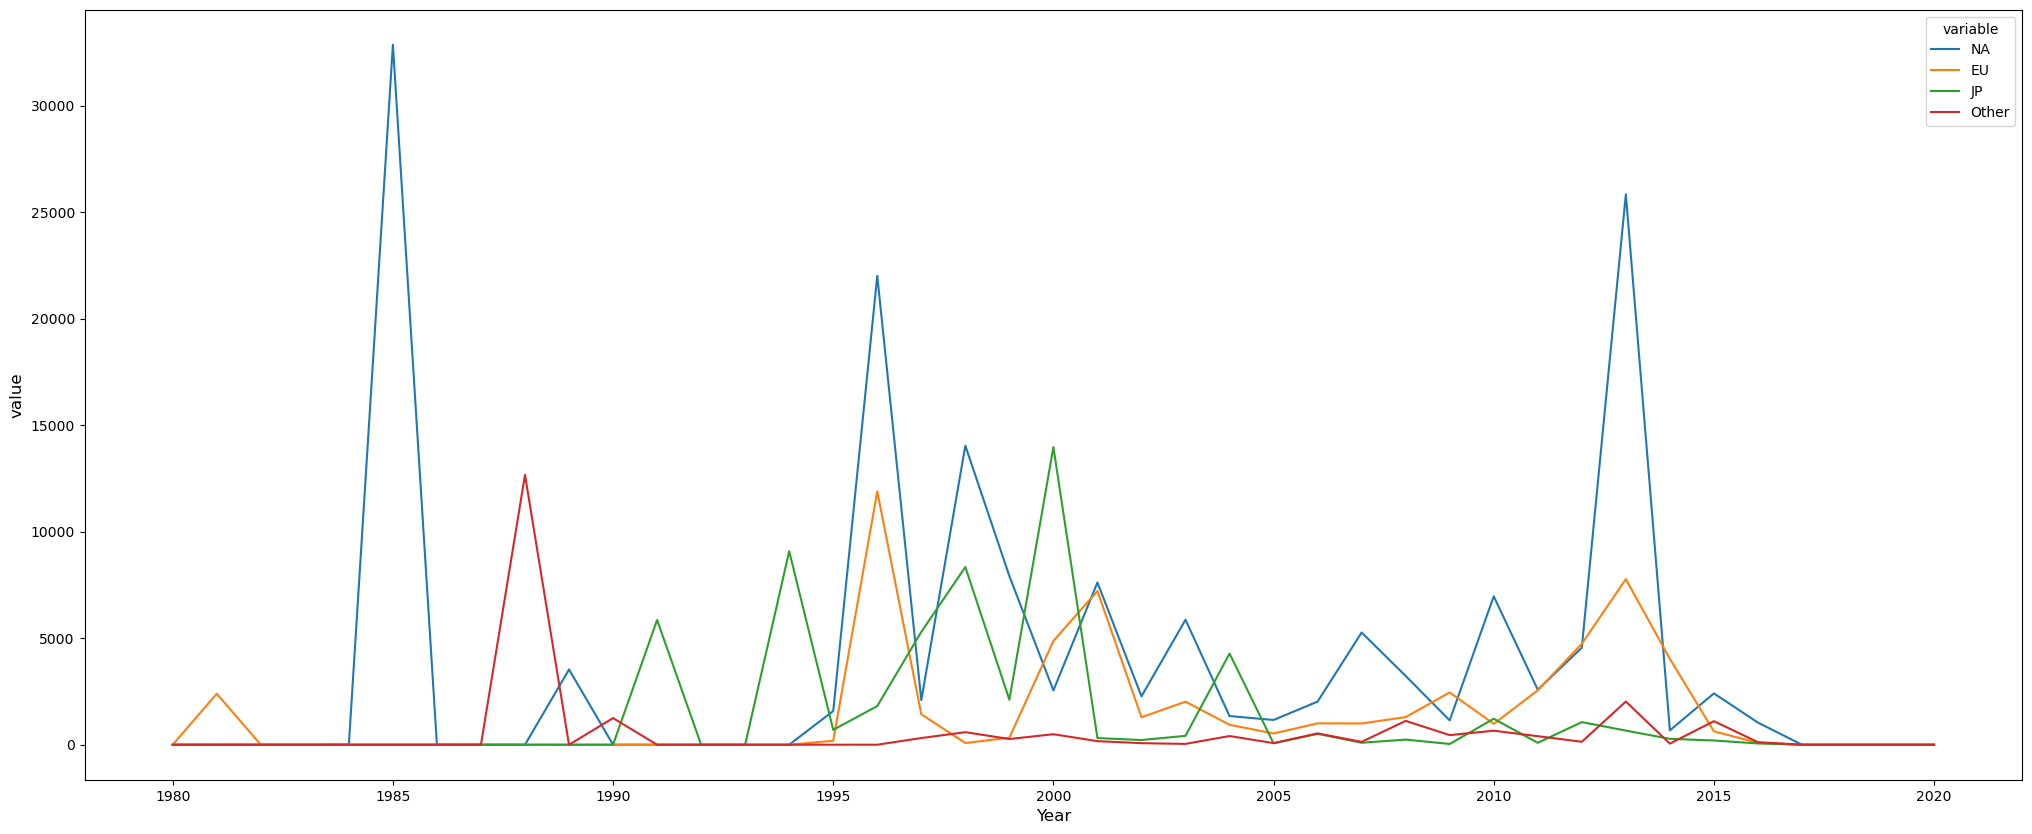

In [13]:
display(df_year.head(5))
df_year_melt = df_year.melt(id_vars = 'Year', value_vars = ['NA','EU','JP','Other'])
display(df_year_melt.head(10))
plt.figure(figsize = (25,10))
sns.lineplot( x='Year' , y = 'value' , hue = 'variable' , data = df_year_melt)

### 위의 데이터프레임으로 시각화 or 결론을 내면 연도별 트렌드(장르의 변화 / 플랫폼 시장의 변화 / 게임 산업 증가량 / 혹은 기하급수적으로 전년 대비 증가하는 경우 원인을 찾아보는 등의 작업 가능)

In [14]:
%%time
df_rank = df2.sort_values(by = ['Year','Total_Sales'], ascending = [True,False])
GENRE = []
GENRE_RATIO = []
PUBLISHER = []
PUBLISHER_RATIO = []
ALL_SALES = []
for i in list(df_rank.Year.unique()):
    #display(df_rank[df_rank['Year'] == i].head(5))
    that_year = df_rank[df_rank['Year'] ==i]
    g = that_year.Genre.value_counts().index[0]
    g_r = round(that_year.Genre.value_counts(10)[0],2)
    p = that_year.Publisher.value_counts().index[0]
    p_r = round(that_year.Publisher.value_counts(10)[0],2)
    S = that_year.Total_Sales.sum()
    GENRE.append(g)
    GENRE_RATIO.append(g_r)
    PUBLISHER.append(p)
    PUBLISHER_RATIO.append(p_r)
    ALL_SALES.append(S)

Year_trend = pd.DataFrame({'y_genre':GENRE,
                           'y_genre_ratio':GENRE_RATIO,
                           'y_publisher':PUBLISHER,
                           'y_publisher_ratio':PUBLISHER_RATIO,
                           'All_Sales' : ALL_SALES})
Year_trend['Year'] = list(sorted(df2['Year'].unique()))
Year_trend


Wall time: 150 ms


,y_genre,y_genre_ratio,y_publisher,y_publisher_ratio,All_Sales,Year
0,Misc,0.50,Atari,0.50,10.88,1980
1,Action,0.54,Atari,0.24,110035.57,1981
2,Action,0.50,Atari,0.39,28.88,1982
3,Action,0.41,Nintendo,0.35,16.80,1983
4,Puzzle,0.21,Nintendo,0.64,50.35,1984
5,Puzzle,0.29,Nintendo,0.50,460053.49,1985
6,Action,0.30,Nintendo,0.30,36.03,1986
7,Sports,0.25,Nintendo,0.25,21.70,1987
8,Platform,0.27,Nintendo,0.40,190047.02,1988
9,Puzzle,0.29,Nintendo,0.53,60073.39,1989


<Figure size 640x480 with 0 Axes>

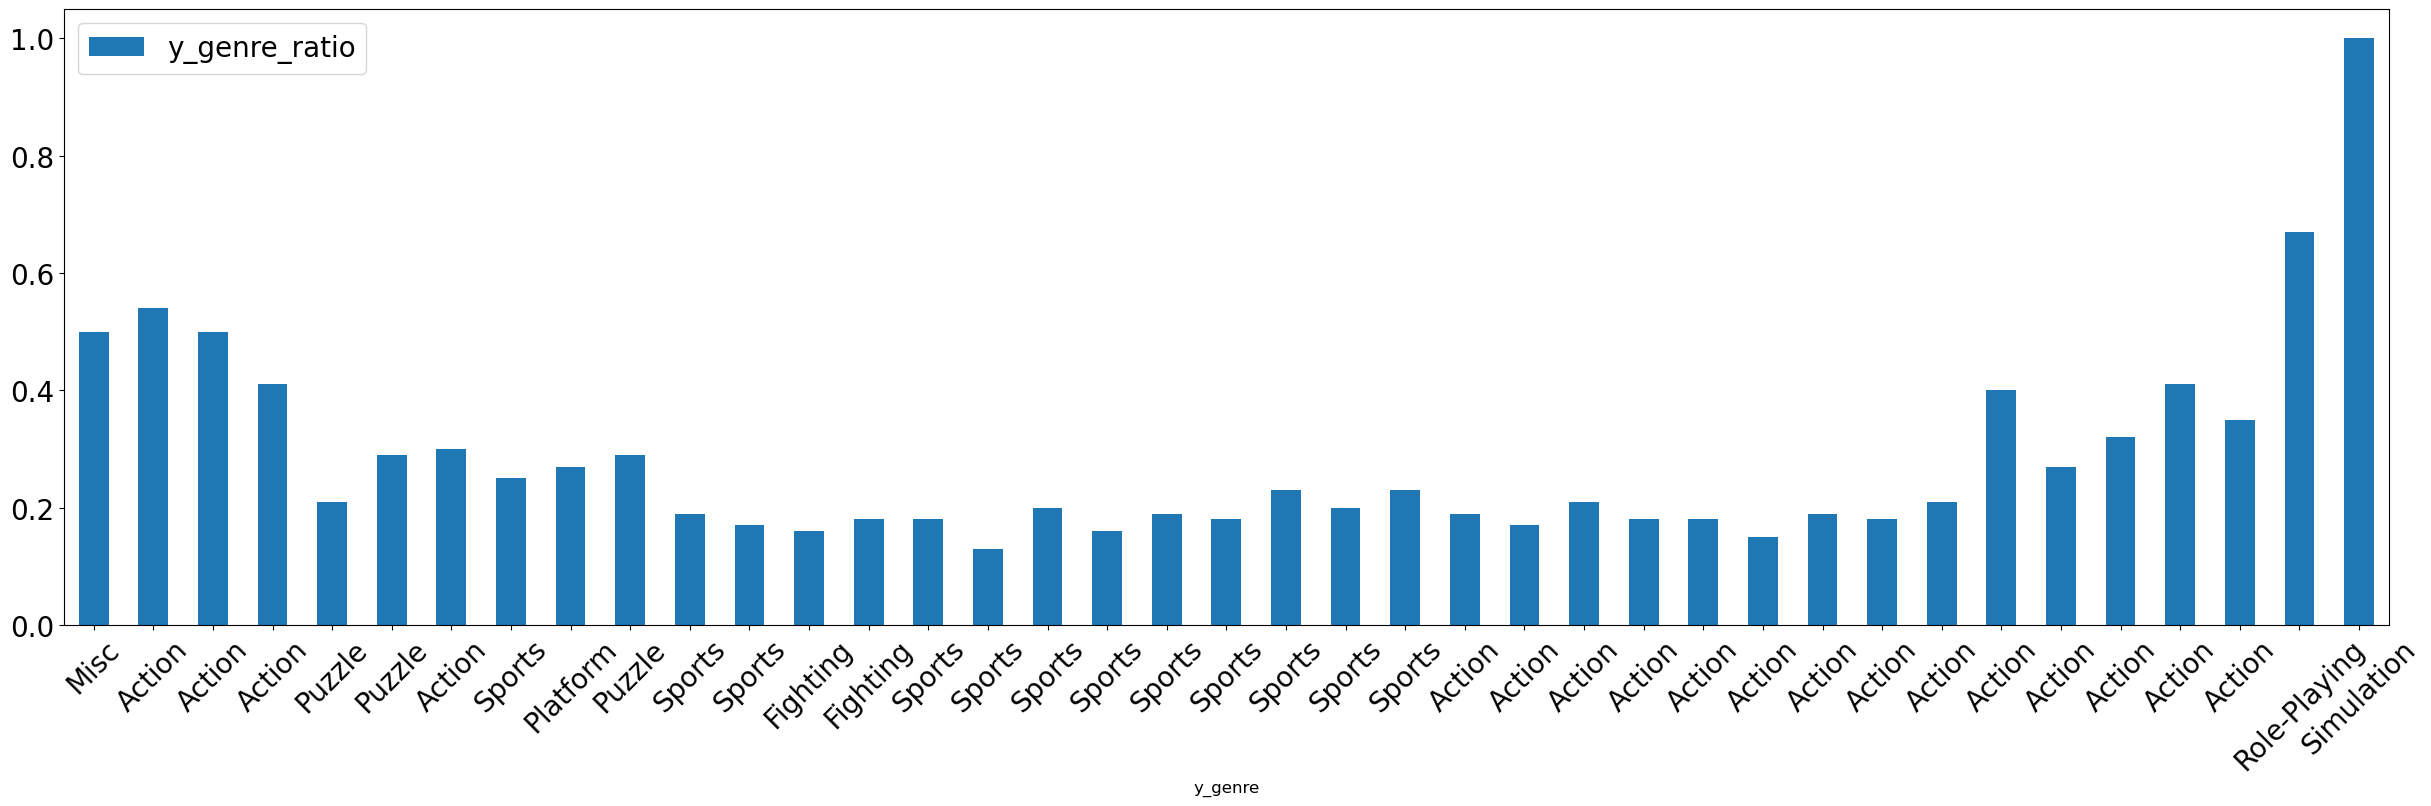

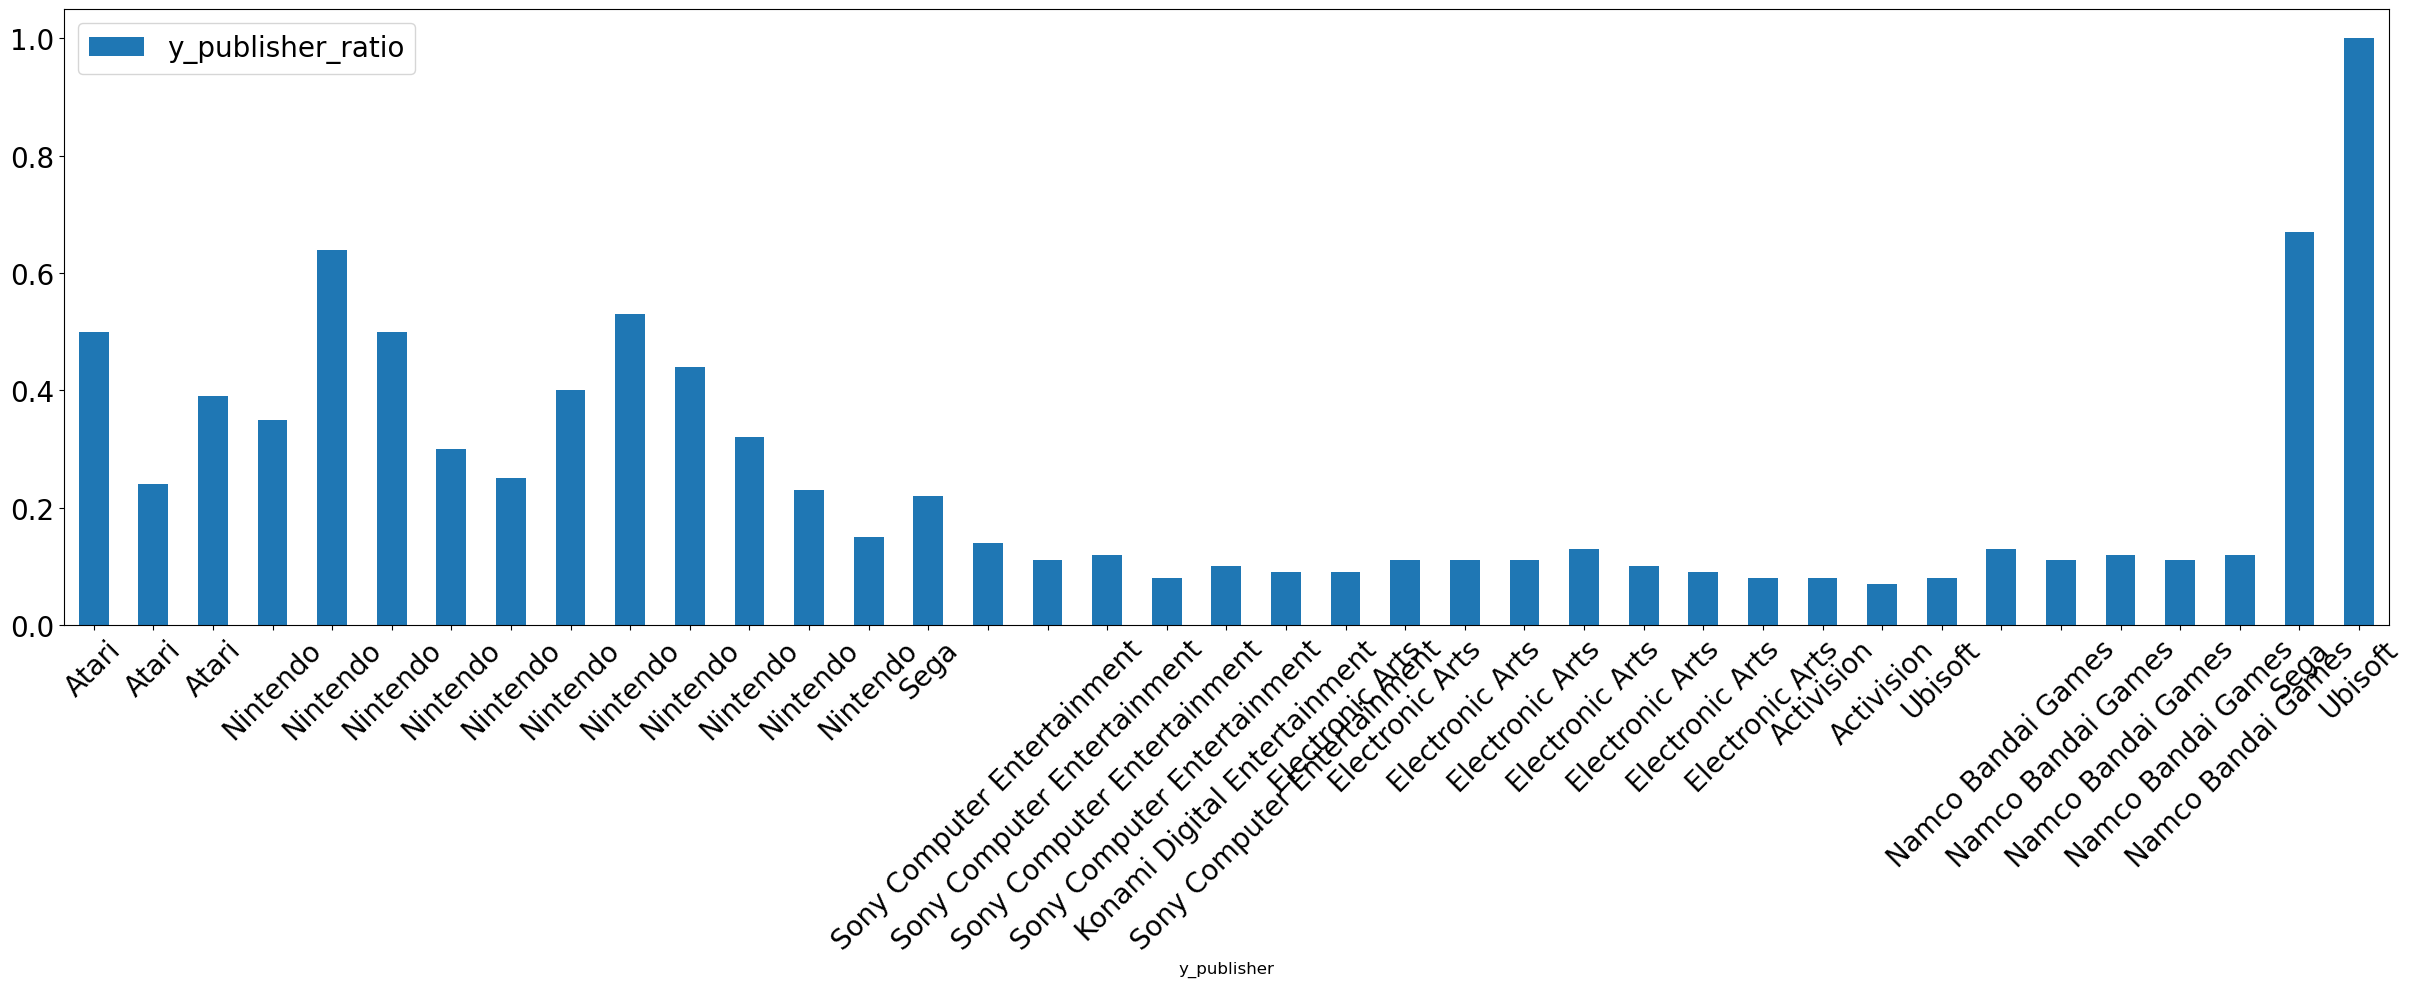

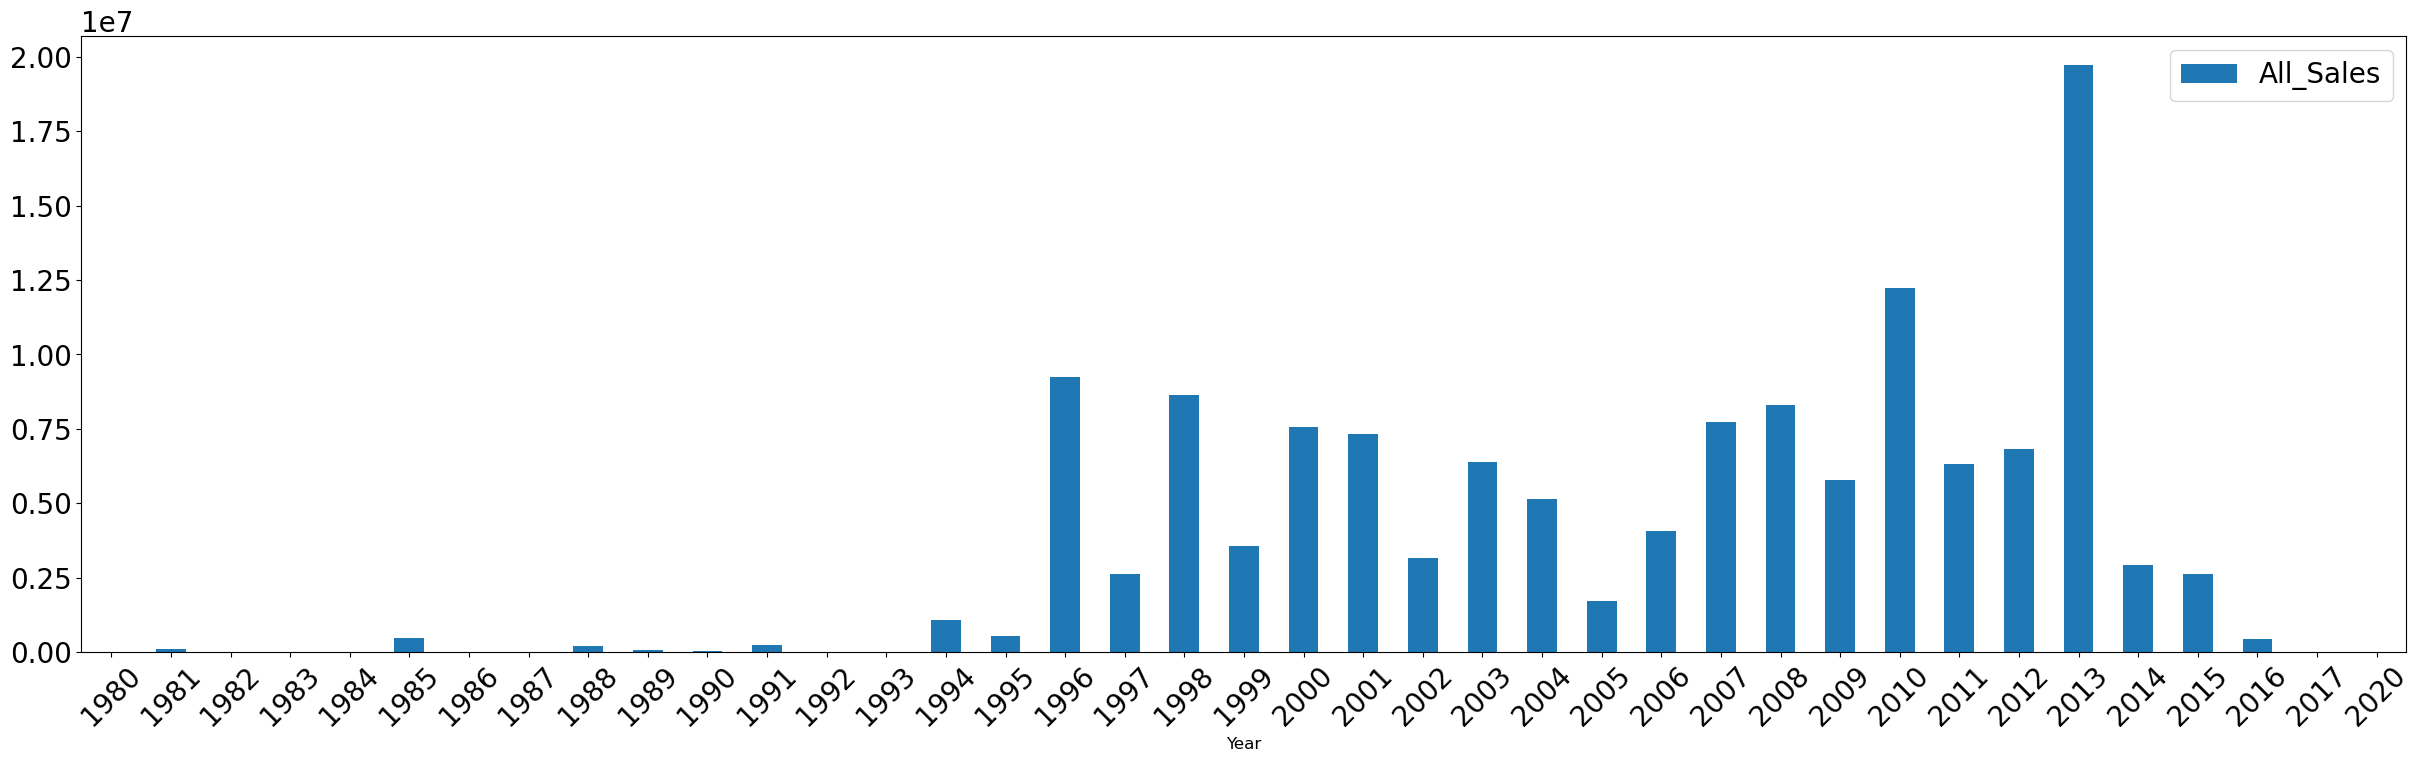

Wall time: 3.72 s


In [15]:
%%time
plt.figure()
plt.rcParams.update({'font.size': 20})
Year_trend.plot(kind = 'bar', x = 'y_genre',y = 'y_genre_ratio',rot = 45,figsize = (30,8))
Year_trend.plot(kind = 'bar', x= 'y_publisher', y = 'y_publisher_ratio',rot = 45,figsize = (30,8))
Year_trend.plot(kind = 'bar', x= 'Year', y = 'All_Sales',rot = 45,figsize = (30,8))
plt.show()

## M3 : 출고량이 높은 게임에 대한 분석 및 시각화

In [16]:
df_game = df2.groupby(['Name','Year']).agg(BestGames = ('Total_Sales','max')).reset_index()
df_game.sort_values(by='BestGames', ascending = False).head(10)

,Name,Year,BestGames
3890,Grand Theft Auto V,2013,9630006.75
4091,Halo: Reach,2010,7030002.84
5797,Mario Kart 64,1996,5550004.32
10427,The Legend of Zelda: Ocarina of Time,1998,4100003.50
7644,Pokemon FireRed/Pokemon LeafGreen,2004,3150007.34
7680,Pokémon Yellow: Special Pikachu Edition,1998,3120011.52
9751,Super Mario Bros. 3,2003,2930002.28
3078,FIFA 14,2013,2930001.39
9742,Super Mario 64,1996,2850009.05
3315,Final Fantasy IX,2000,2780002.53


In [17]:
label = df2[['Name','Platform','Year','Genre','Publisher']]
df_cls = df2[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
#df_cls_log = np.log(df_cls)
scaler = StandardScaler()
feat = scaler.fit_transform(df_cls)
feat

array([[-0.03700789, -0.03998593, -0.02730812, -0.04479158, -0.05905863],
       [-0.03700683, -0.03998593, -0.02730812, -0.04479061, -0.05905764],
       [-0.03700821, -0.03998593, -0.02730768, -0.04479158, -0.05905877],
       ...,
       [-0.03700462, -0.03998235, -0.02730746, -0.04477893, -0.05905333],
       [-0.0370078 , -0.03998499, -0.0273026 , -0.04478866, -0.05905623],
       [-0.03700821, -0.03998593, -0.02730458, -0.04479061, -0.05905771]])

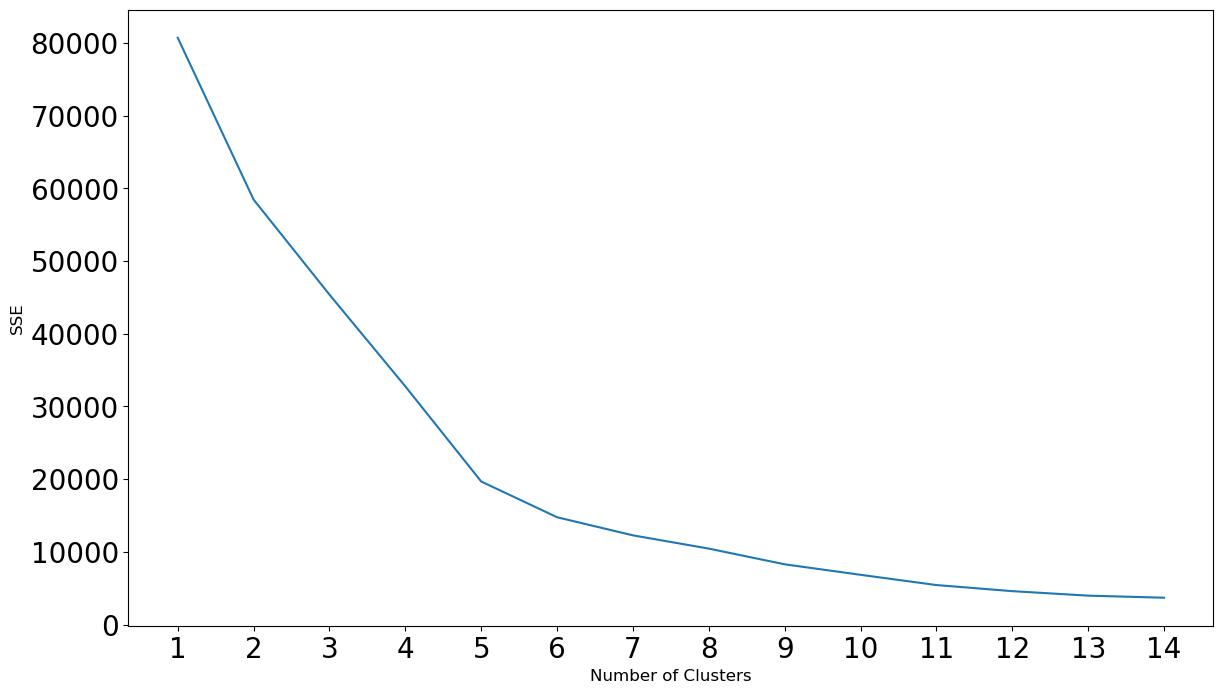

Wall time: 5.95 s


In [18]:
%%time
kmeans_kwargs = {'init' : 'random', 'n_init' : 10,'max_iter':200,'random_state':42}
sse=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters= k,**kmeans_kwargs)
    kmeans.fit(feat)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1,15),sse)
plt.xticks(range(1,15))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [19]:
Name = label['Name']
Platform = label['Platform']
Year = label['Year']
Genre = label['Genre']
Publisher = label['Publisher']
pca = PCA(n_components = 2)
done = pca.fit_transform(feat)
Done = pd.DataFrame(done, columns = ['PC1','PC2'])
Done['Name'] = Name
Done['Platform'] = Platform
Done['Year'] = Year
Done['Genre'] = Genre
Done['Publisher'] = Publisher
Done

,PC1,PC2,Name,Platform,Year,Genre,Publisher
0,-0.083793,-0.013776,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
1,-0.083791,-0.013775,The Munchables,Wii,2009.0,Action,Namco Bandai Games
2,-0.083793,-0.013776,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
3,-0.083793,-0.013776,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
4,-0.083791,-0.013774,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...,...,...
16136,-0.083791,-0.013775,4 Elements,PC,2009.0,Puzzle,Mastertronic
16137,-0.083793,-0.013776,50 Cent: Bulletproof,PS2,2005.0,Action,Vivendi Games
16138,-0.083785,-0.013768,Shaun White Snowboarding: Road Trip,Wii,2008.0,Sports,Ubisoft
16139,-0.083789,-0.013776,Fantasia: Music Evolved,X360,2014.0,Misc,Disney Interactive Studios


Text(0.5, 1.0, 'PCA_Genre')

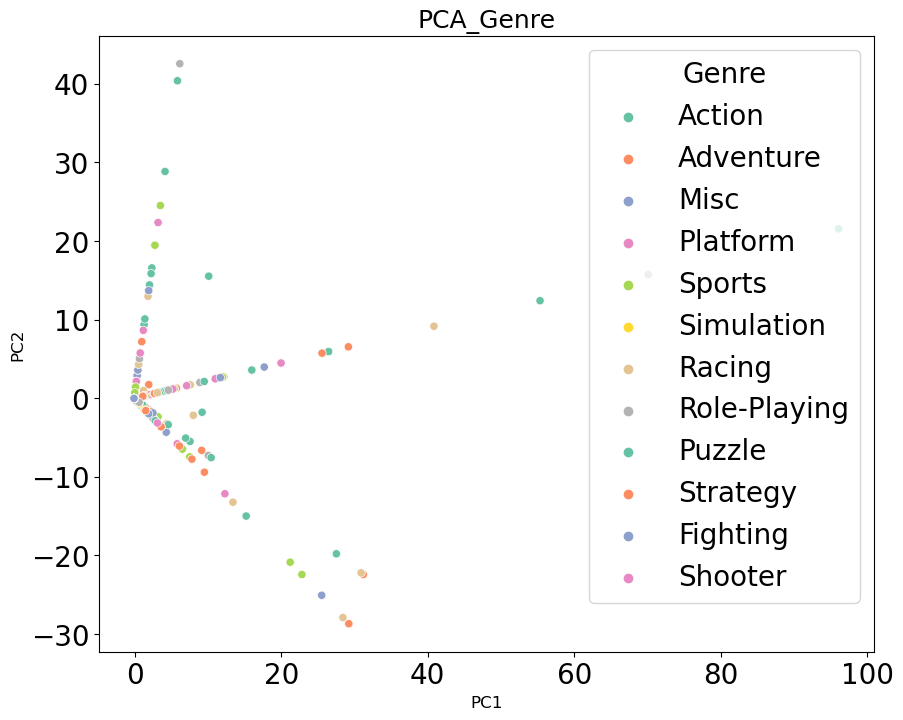

In [20]:
plt.figure(figsize = (10,8))
scat = sns.scatterplot(x = 'PC1',y='PC2' , data = Done ,palette = 'Set2', hue='Genre')
scat.set_title('PCA_Genre')

In [21]:
def plot_radar_chart(df, cluster_id, n_clusters):
    # 변수의 수
    cls_df_sel = df.drop(cluster_id, axis=1).copy()
    categories = list(cls_df_sel)
    N = len(categories)
    
    # value 계산
    values = cls_df_sel.values
    value = values.max().max()
    # 변수의 수에 따른 angle 계산
    angles = [n / float(N) * 2 *np.pi for n in range(N)]
    angles += angles[:1]
    
    # graph figure
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111,polar = True)
    
    # x축 라벨링
    plt.xticks(angles[:-1] , categories , color = 'grey' , size = 20)
    # y축 라벨링
    
    ax.set_rlabel_position(0)
    ticks = list(range(0,10,1))
    labels = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
    plt.yticks(ticks , labels, color = 'grey' , size =8)
    
    color_ = plt.cm.Spectral(np.linspace(0 , 1 , n_clusters , endpoint = False))
    
    for cl_n in range(n_clusters):
        ax.plot(angles[:-1], values[cl_n] , linewidth = 2, linestyle = 'solid' ,color = color_[cl_n], label = 'cluster' + str(cl_n +1) ,alpha = 0.7)
        ax.fill(angles[:-1], values[cl_n] ,color = color_[cl_n], alpha =0.4 )
               
    plt.legend(bbox_to_anchor = (1.4 , 0.8) , fontsize = 11)
    plt.tight_layout()
    plt.show()

def plot_radar_chart_decomp2(df , cluster_id, n_clusters):
    cls_df_sel = df.drop(cluster_id, axis=1).copy()
    categories = list(cls_df_sel)
    N = len(categories)
    values = cls_df_sel.values
    value = values.max().max()
    angles = [n / float(N) *2 *np.pi for n in range(N)]
    angles += angles[:1]
    n_sub = round(n_clusters/2)
    
    color_ = plt.cm.Spectral(np.linspace(0 , 1 , n_clusters ))
    for i, cl_n in enumerate(range(n_clusters)):
        plt.figure(figsize=(15,15))
        ax = plt.subplot()
        ax = plt.subplot(n_sub , 2 , 1, polar = True)
        plt.xticks(angles[:-1], categories , color = 'grey' , size = 20)
        ax.set_rlabel_position(0)
        ticks = list(range(0,10,1))
        labels = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
        plt.yticks(ticks, labels, color = 'grey', size=12)
        ax.plot(angles[:-1], values[cl_n] , linewidth = 2, linestyle = 'solid', color = color_[cl_n], label = 'cluster_'+str(cl_n+1),alpha=0.7)
        ax.fill(angles[:-1], values[cl_n], color = color_[cl_n] , alpha=0.4)
        plt.legend(bbox_to_anchor = (1.4 , 0.8) ,fontsize = 12)
        plt.tight_layout()

In [22]:
%%time
kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init=100,max_iter=500,random_state = 42)
kmeans.fit(feat)
df_kmeans = pd.DataFrame(feat, columns = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'])
df_kmeans['cluster'] = kmeans.fit_predict(feat)
df2['cluster'] = kmeans.fit_predict(feat)
df_kmeans

Wall time: 2.24 s


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,cluster
0,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
1,-0.037007,-0.039986,-0.027308,-0.044791,-0.059058,0
2,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
3,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
4,-0.037007,-0.039984,-0.027308,-0.044788,-0.059057,0
...,...,...,...,...,...,...
16136,-0.037007,-0.039985,-0.027308,-0.044791,-0.059057,0
16137,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
16138,-0.037005,-0.039982,-0.027307,-0.044779,-0.059053,0
16139,-0.037008,-0.039985,-0.027303,-0.044789,-0.059056,0


In [23]:
df_kmeans.groupby('cluster').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
cluster,,,,,
0,-0.013659,-0.019623,-0.012354,-0.025644,-0.025013
1,53.577089,-0.039934,-0.027287,-0.044732,46.383453
2,-0.036976,-0.039933,66.586161,-0.044757,21.241103
3,0.440427,-0.039968,-0.027306,29.560852,2.503024
4,-0.036984,39.625849,-0.027296,-0.044738,14.839280


Text(0.5, 1.0, 'PCA')

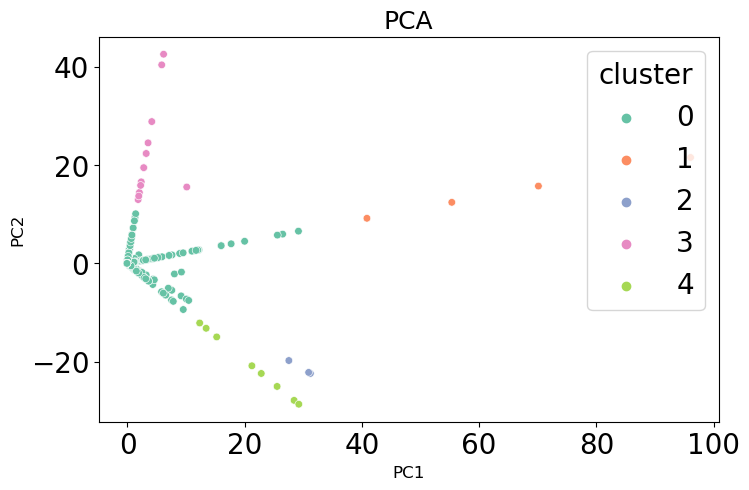

In [24]:
df_scatter = pd.concat( [Done[['PC1','PC2']], df_kmeans['cluster']], axis=1)
plt.figure(figsize = (8,5))
scat = sns.scatterplot(x = 'PC1', 
                       y = 'PC2',
                       s = 30,
                       data = df_scatter,
                       hue = 'cluster',
                       palette = 'Set2')
scat.set_title('PCA')

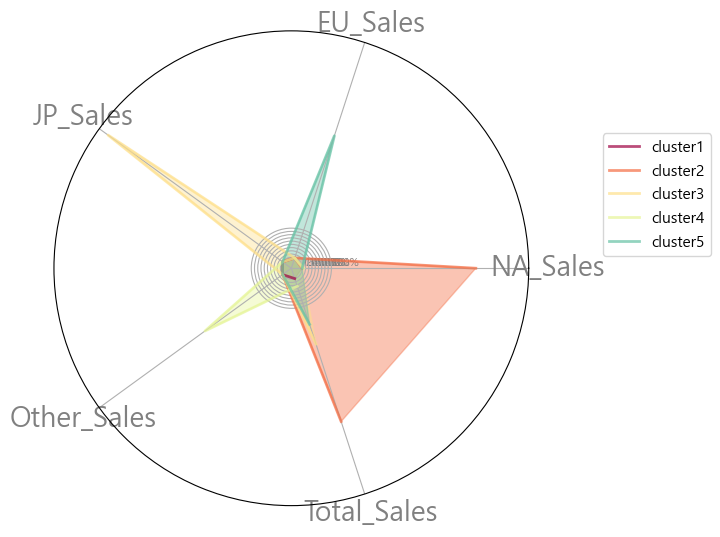

Wall time: 3 s


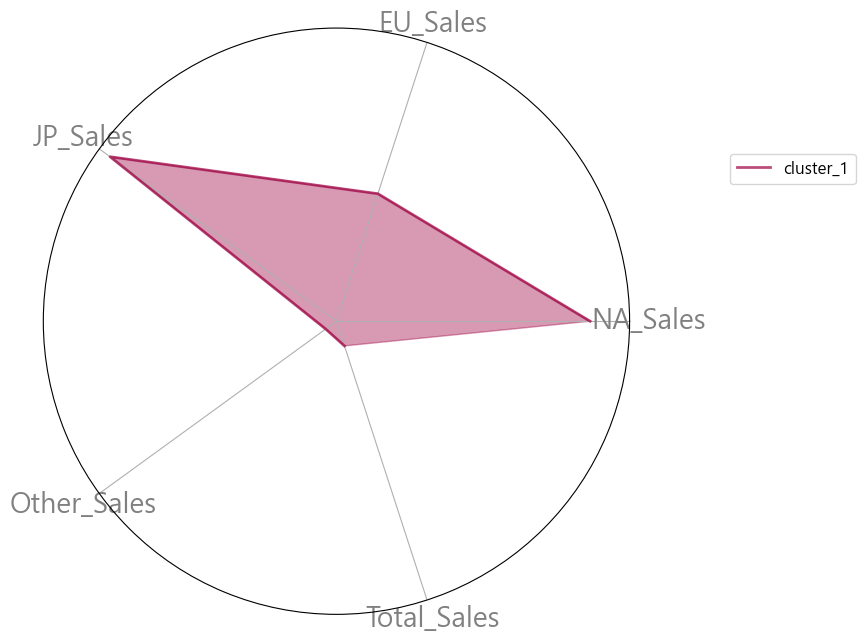

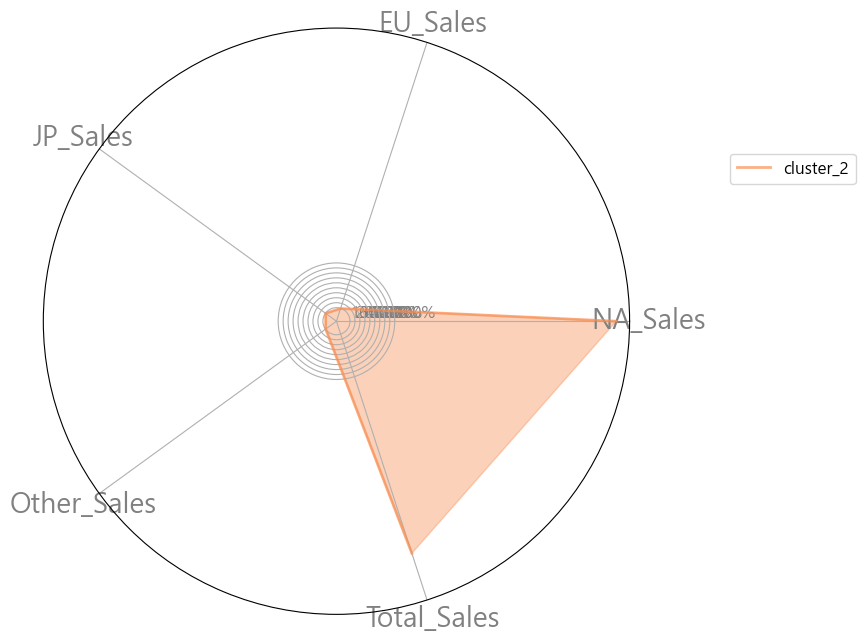

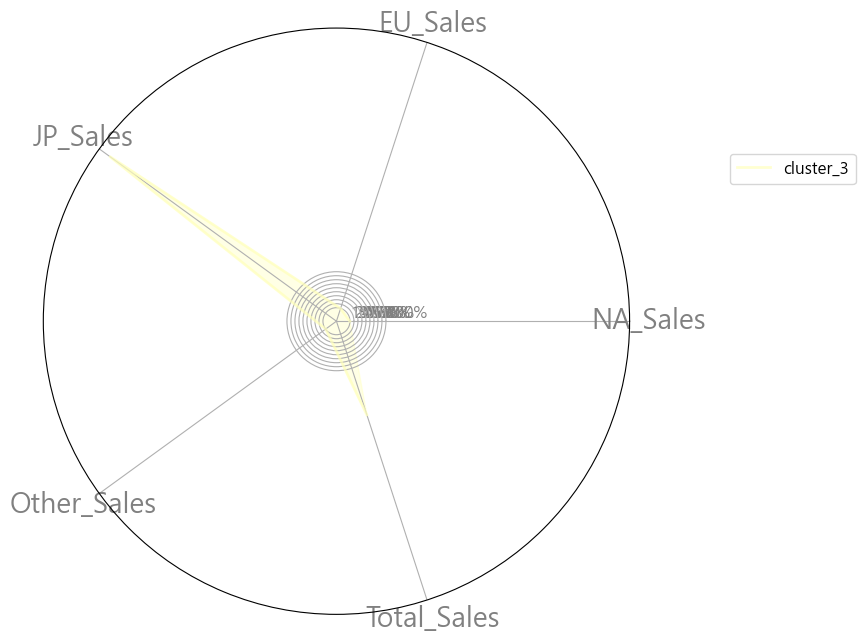

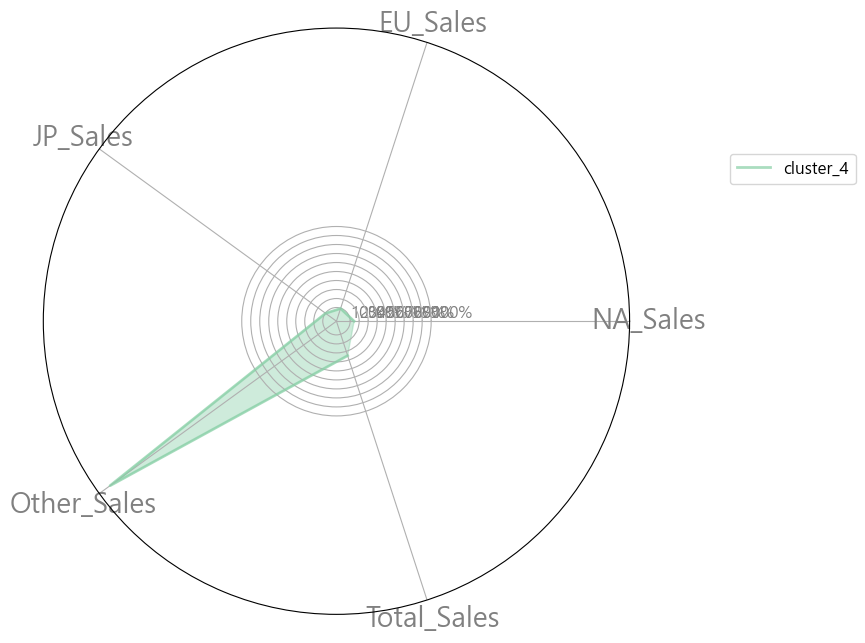

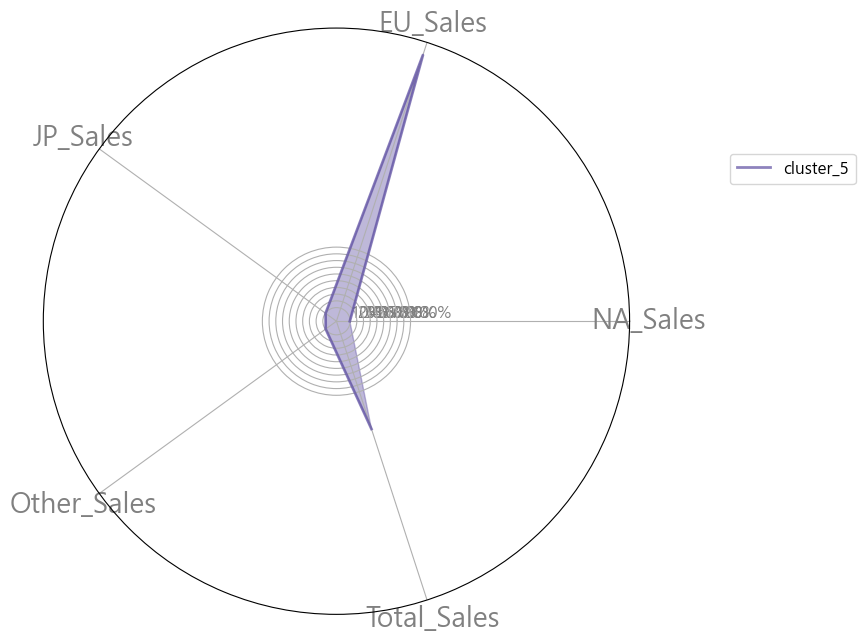

In [25]:
%%time
plot_cluster = df_kmeans.groupby('cluster').mean().reset_index()
# = = = = = = = = = = = = = = = = = = =
plt.rc('font', family='Malgun Gothic')
plot_radar_chart(plot_cluster, 'cluster' , 5)
plot_radar_chart_decomp2(plot_cluster , 'cluster' , 5)

In [26]:
def cluster_characteristic_vis(df,col):
    '''
    cluster 별로 각각의 feature의 mean값과 median값을 lineplot으로 그림,
    각각의 cluster의 feature들의 분포를 한번에 확인 가능
    '''
    # num of clusters
    num = df[col].nunique()
    cluster=[]
    cls=[]
    cls_plt=[]
    for i in range(0,num):
        tmp = df[df[col]==i]
        cluster.append(tmp)
        cl = pd.DataFrame()
        cl = cluster[i].describe().iloc[[1,5]] ##m ean and median
        cls.append(cl)
        cl_T = cls[i].T
        cls_plt.append(cl_T)
         # Visualization
        plt.rcParams.update({'font.size':13 , 'font.weight' :"bold"})
        cls[i].T.iloc[0:-1].plot.line(figsize=(10,10),title = f"cluster_{i}")
        plt.xticks(range(0,len(cls_plt[0].index)) , cls_plt[0].index , rotation = 70)
        plt.grid()
        plt.show()
        
def cluster_visualize_set(df):
    '''
    cluster 별로 각 feature들의 mean과 median 분포 확인
    여러 cluster 동시에 비교가능
    '''
    df_mean = df.groupby('cluster').mean()
    df_median = df.groupby('cluster').median()
    df_mean.reset_index(level=['cluster'] , inplace = True)
    df_median.reset_index(level=['cluster'],inplace = True)
    
    mean_t = df_mean.T.iloc[1:]
    median_t = df_median.T.iloc[1:]
    
    
    # lineplot
    plt.figure()
    plt.rcParams.update({'font.size':13 ,'font.weight':'bold'})
    ax0 = mean_t.plot.line(figsize=(10,10), title='mean_line')
    plt.xticks(range(0,len(mean_t.index)), mean_t.index , rotation = 90)
    
    plt.figure()
    plt.rcParams.update({'font.size':13 ,'font.weight':'bold'})
    ax1 = median_t.plot.line(figsize=(10,10) , title='median_line')
    plt.xticks(range(0,len(median_t.index)) , median_t.index , rotation = 90)
    
    # barplot
    plt.rcParams.update({'font.size':13 ,'font.weight':'bold'})
    ax2 = mean_t.plot.bar(figsize=(10,10), title='mean_bar')
    ax2.set_xticklabels(mean_t.index , rotation = 90)
    plt.rcParams.update({'font.size' : 13, 'font.weight' : 'bold'})
    plt.grid()
    ax2.figsize=(10,10)
    
    plt.rcParams.update({'font.size':13 ,'font.weight':'bold'})
    ax3 = median_t.plot.bar(figsize=(10,10), title='median_bar')
    ax3.set_xticklabels(median_t.index , rotation = 90)
    plt.rcParams.update({'font.size' : 13, 'font.weight' : 'bold'})
    plt.grid()
    ax3.figsize=(10,10)
    plt.tight_layout()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


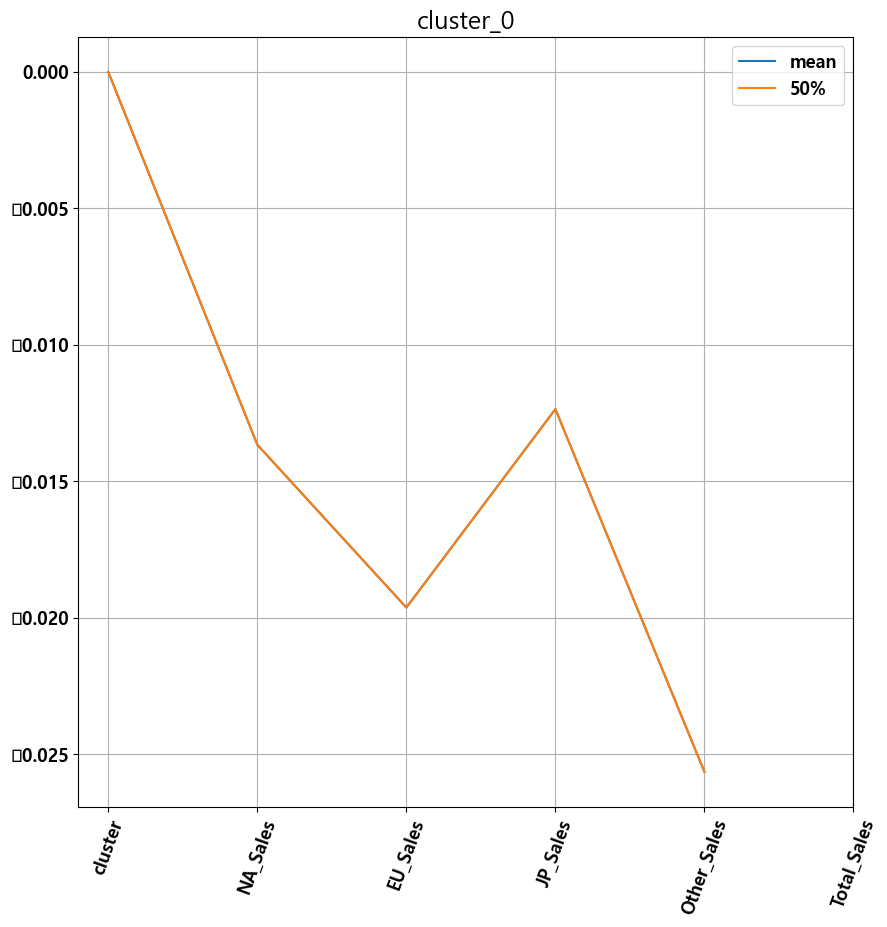

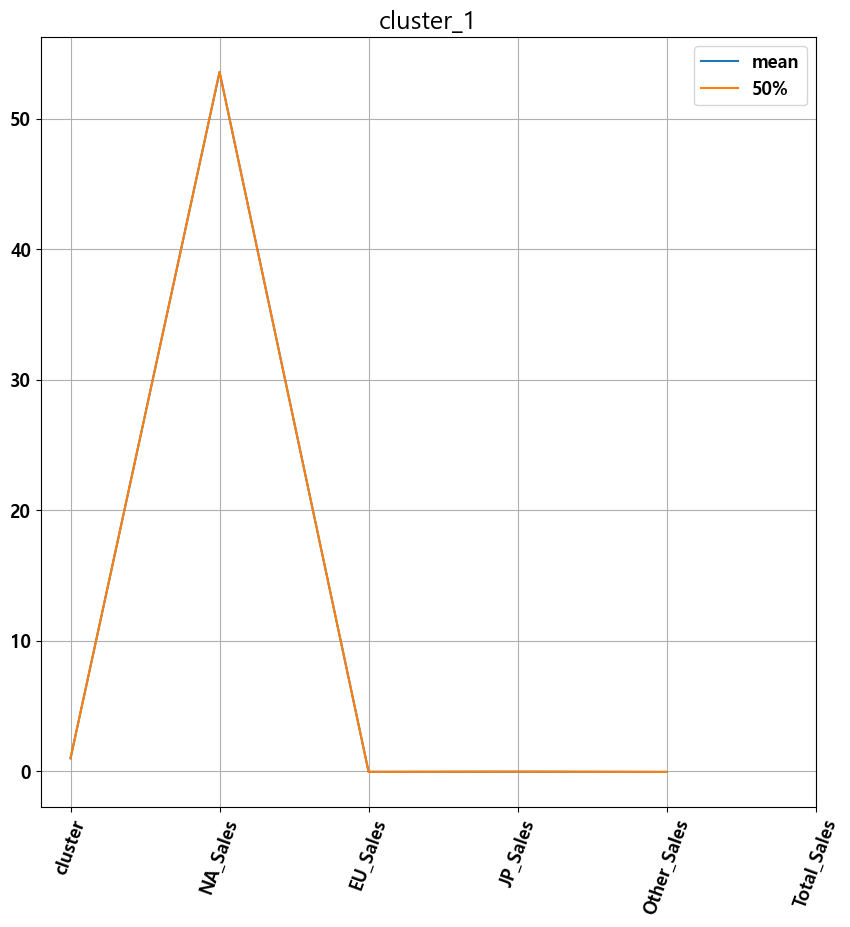

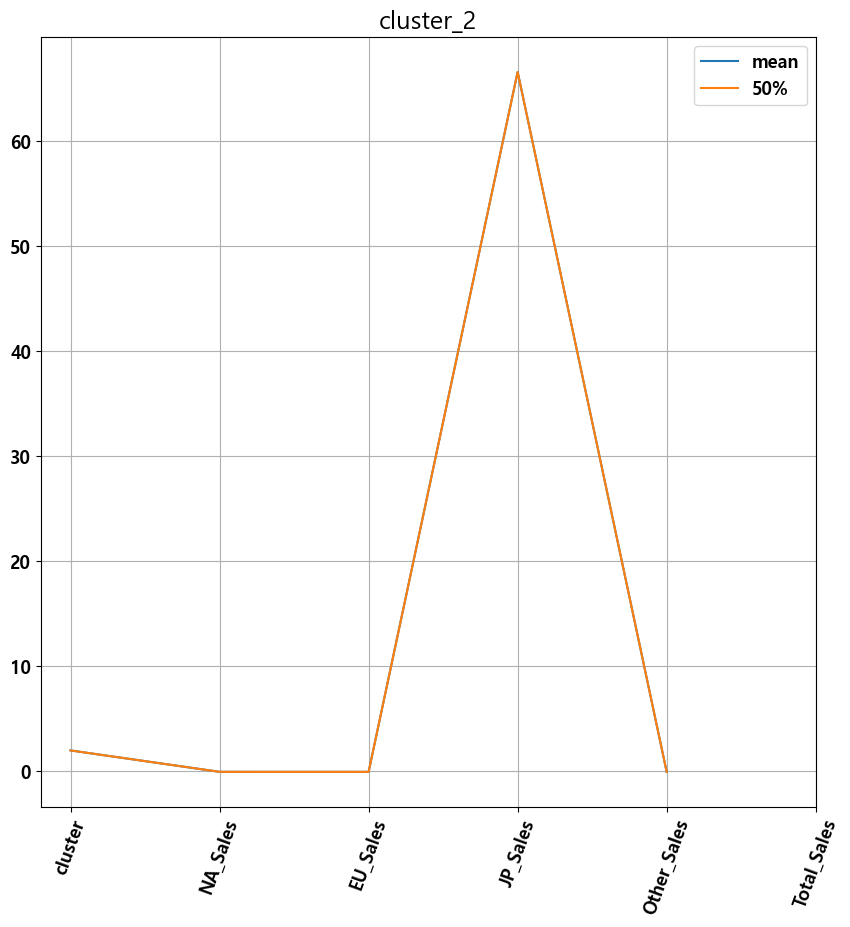

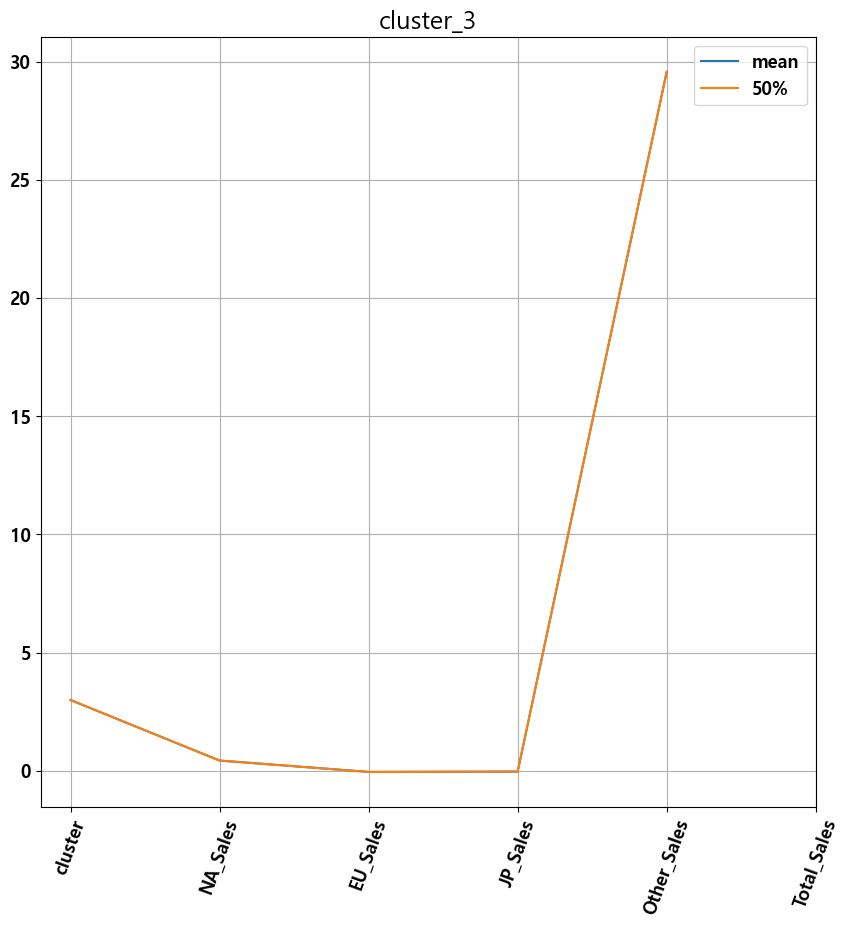

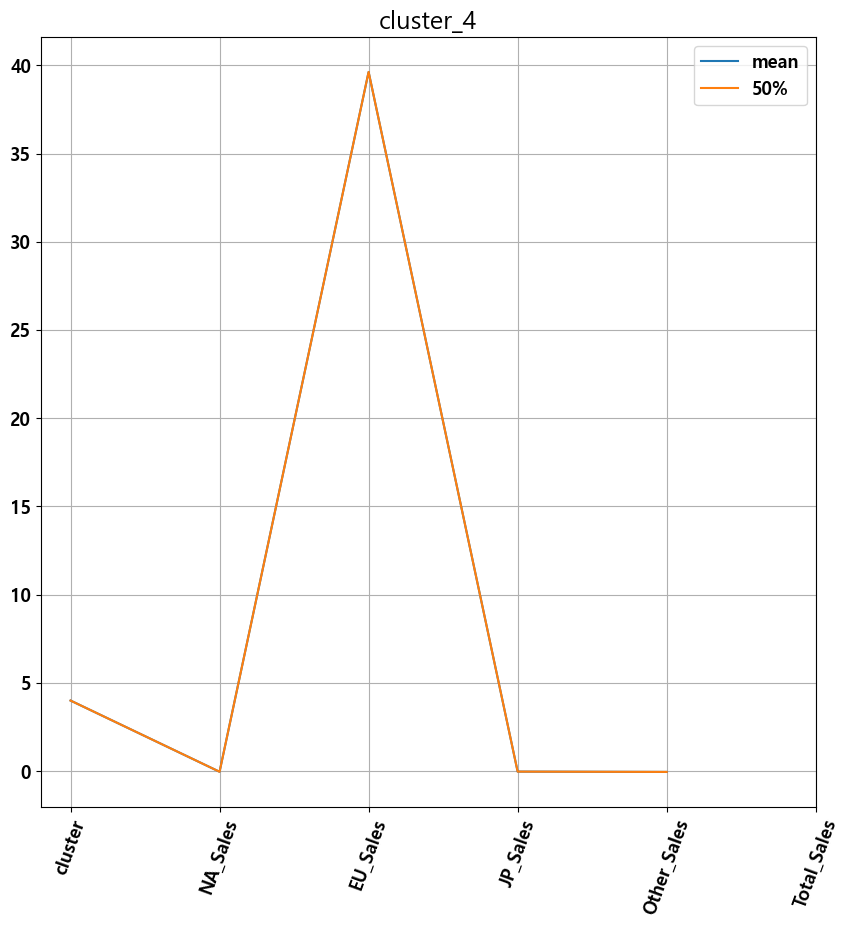

In [27]:
cluster_characteristic_vis(plot_cluster,'cluster')

<Figure size 640x480 with 0 Axes>

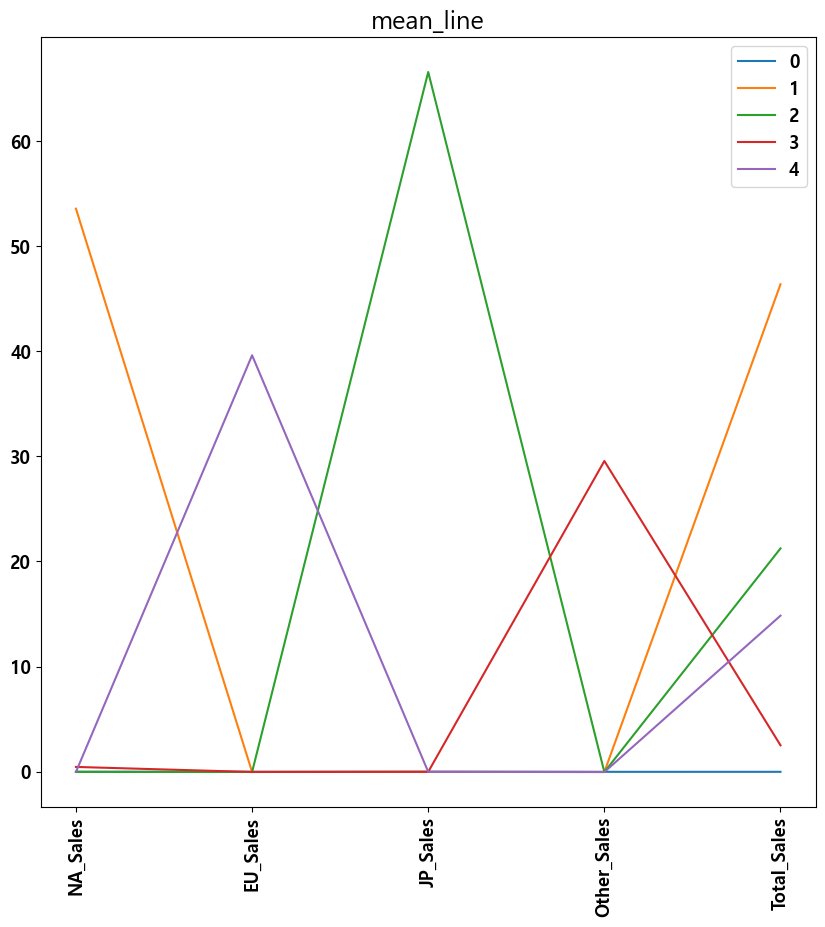

<Figure size 640x480 with 0 Axes>

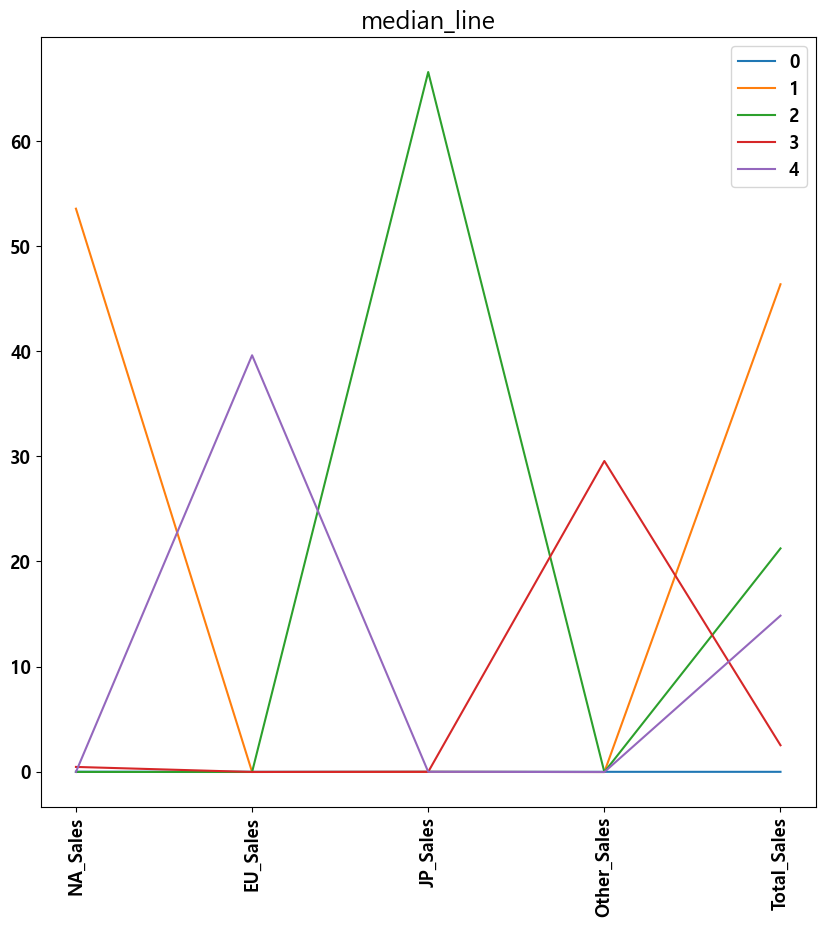

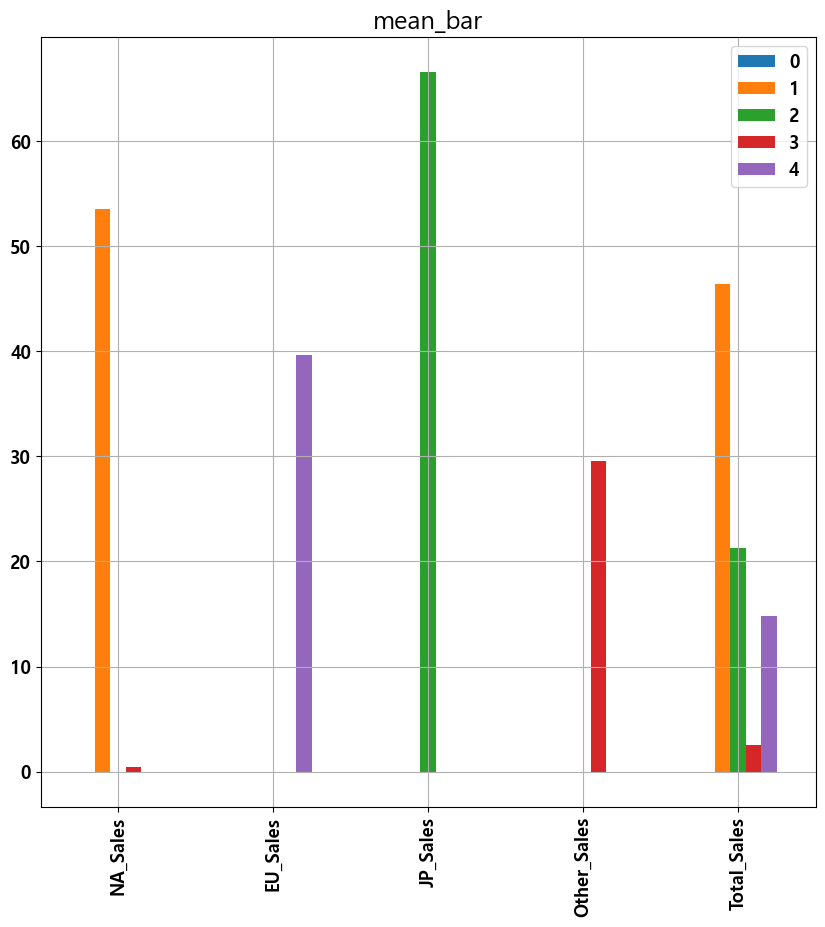

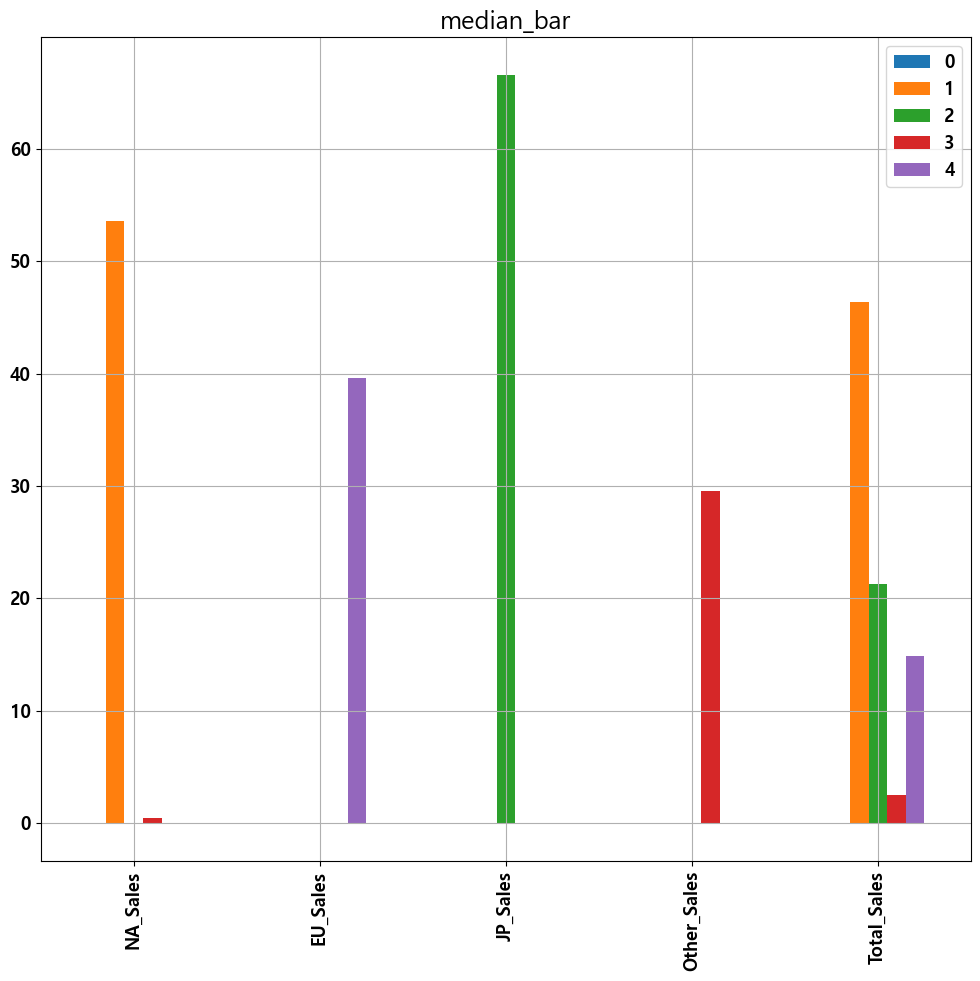

In [28]:
cluster_visualize_set(plot_cluster)

In [29]:
def make_df(df,mode):
    '''
    df에 전처리된(logs, scaler(), clustering, labeling)된 input_df를 넣고 
    mode에 mean 혹은 median을 입력하면 frame 형태로 각 클러스터 별 feature들의 mean 혹은 median cnffur
    '''
    df_mean = df.groupby('cluster').mean()
    df_median = df.groupby('cluster').median()
    df_mean.reset_index(level = ['cluster'],inplace = True)
    df_median.reset_index(level = ['cluster'] , inplace = True)
    if mode =='mean':
        return df_mean.T
    if mode == 'median':
        return df_median.T
    else:
        print("ERROR")
        
make_df(df_kmeans,'mean')


,0,1,2,3,4
cluster,0.000000,1.000000,2.000000,3.000000,4.000000
NA_Sales,-0.013659,53.577089,-0.036976,0.440427,-0.036984
EU_Sales,-0.019623,-0.039934,-0.039933,-0.039968,39.625849
JP_Sales,-0.012354,-0.027287,66.586161,-0.027306,-0.027296
Other_Sales,-0.025644,-0.044732,-0.044757,29.560852,-0.044738
Total_Sales,-0.025013,46.383453,21.241103,2.503024,14.839280


In [30]:
make_df(df_kmeans,'median')

,0,1,2,3,4
cluster,0.000000,1.000000,2.000000,3.000000,4.000000
NA_Sales,-0.037008,51.233638,-0.036973,-0.036997,-0.036989
EU_Sales,-0.039986,-0.039949,-0.039936,-0.039971,41.505746
JP_Sales,-0.027308,-0.027291,68.867948,-0.027308,-0.027306
Other_Sales,-0.044791,-0.044746,-0.044758,26.225005,-0.044744
Total_Sales,-0.059058,44.353464,21.970751,1.988590,15.545362


In [31]:
df_kmeans

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,cluster
0,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
1,-0.037007,-0.039986,-0.027308,-0.044791,-0.059058,0
2,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
3,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
4,-0.037007,-0.039984,-0.027308,-0.044788,-0.059057,0
...,...,...,...,...,...,...
16136,-0.037007,-0.039985,-0.027308,-0.044791,-0.059057,0
16137,-0.037008,-0.039986,-0.027308,-0.044792,-0.059059,0
16138,-0.037005,-0.039982,-0.027307,-0.044779,-0.059053,0
16139,-0.037008,-0.039985,-0.027303,-0.044789,-0.059056,0


In [32]:
df_kmeans.groupby('cluster').agg(Mean_NA = ('NA_Sales','mean'),
                                 Mean_EU = ('EU_Sales','mean'),
                                 Mean_JP = ('JP_Sales','mean'),
                                 Mean_Other = ('Other_Sales','mean'),
                                 num = ('cluster','count')
                                    ).reset_index()

,cluster,Mean_NA,Mean_EU,Mean_JP,Mean_Other,num
0,0,-0.013659,-0.019623,-0.012354,-0.025644,16112
1,1,53.577089,-0.039934,-0.027287,-0.044732,4
2,2,-0.036976,-0.039933,66.586161,-0.044757,3
3,3,0.440427,-0.039968,-0.027306,29.560852,14
4,4,-0.036984,39.625849,-0.027296,-0.044738,8


In [33]:
Top_150 = df2.sort_values(by = 'Total_Sales', ascending = False).head(150)
display(Top_150)
display(Top_150['cluster'].value_counts())
display(Top_150['Generation'].value_counts())

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Generation,Where,cluster
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75,2010,NA_Sales,1
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84,2010,NA_Sales,1
577,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32,1990,NA_Sales,1
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50,1990,NA_Sales,1
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34,2000,JP_Sales,2
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,3120011.52,1990,JP_Sales,2
9829,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28,2000,NA_Sales,0
7865,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,2930001.39,2010,EU_Sales,4
6458,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05,1990,EU_Sales,4
3589,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53,2000,JP_Sales,2


0    121
3     14
4      8
1      4
2      3
Name: cluster, dtype: int64

2000    82
2010    46
1990    20
1980     2
Name: Generation, dtype: int64

[Text(0.5, 1.0, 'Top_150')]

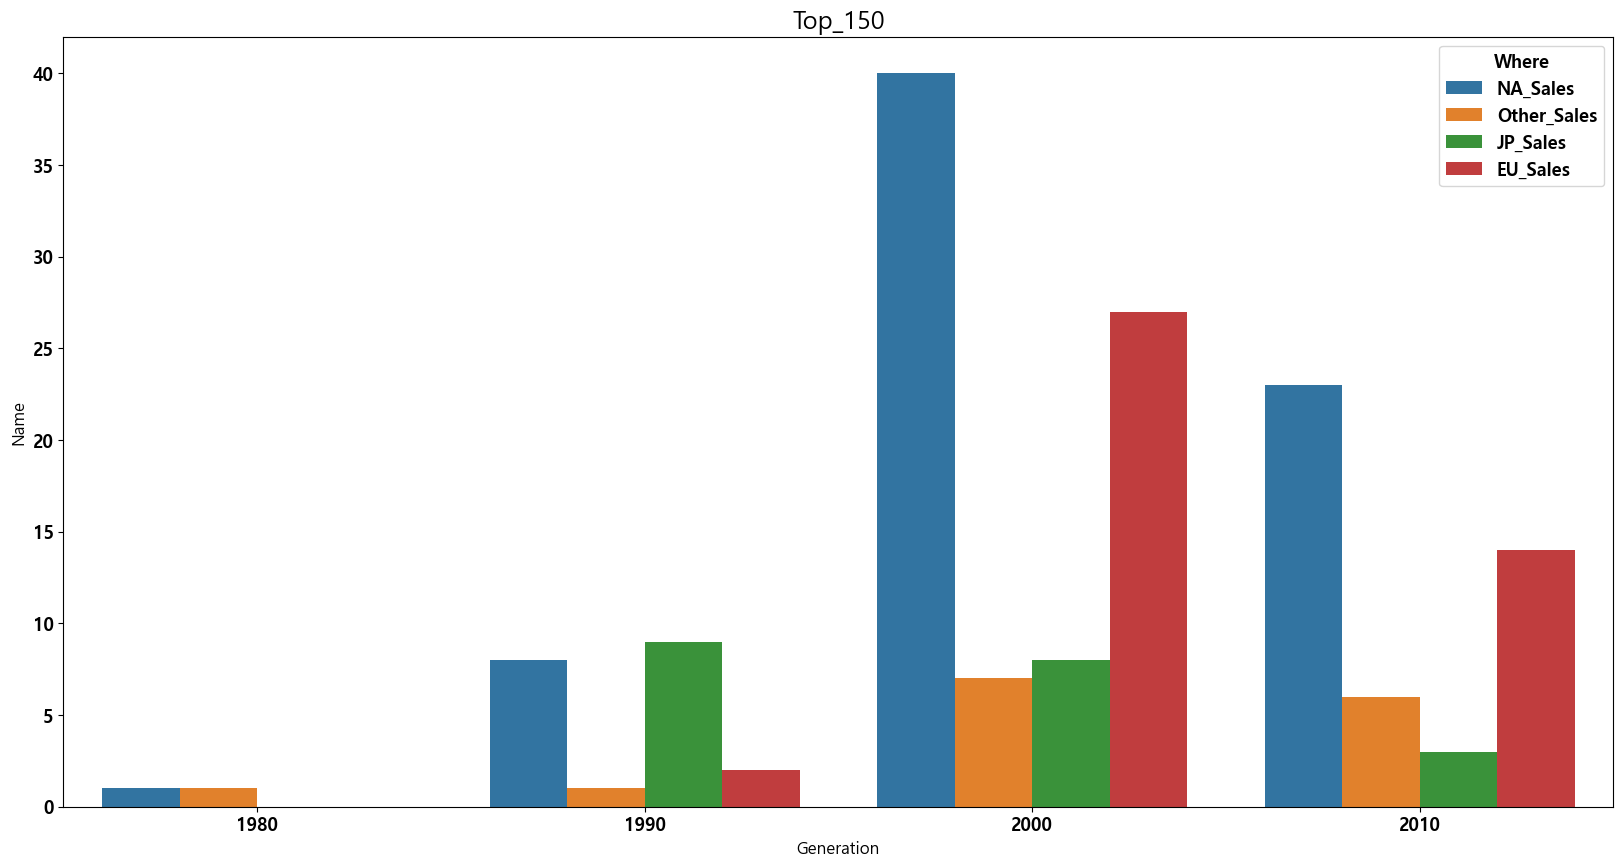

In [34]:
#.apply(lambda x: x / x.sum())
Top_Gen_Where = Top_150.groupby(['Generation','Where'])['Name'].count().reset_index().sort_values(by = ['Generation','Name'], ascending = [True,False])
plt.figure(figsize=(20,10))
sns.barplot(data = Top_Gen_Where, x = 'Generation',y = 'Name',hue = 'Where').set(title = 'Top_150')

- NA에서 인기 많은 품목은 뭘까?

In [35]:
NA_Genre = pd.DataFrame({'Genre':list(Top_150[Top_150['Where'] == 'NA_Sales']['Genre'].value_counts().index),
                         'Ratio':list(Top_150[Top_150['Where'] == 'NA_Sales']['Genre'].value_counts())})
EU_Genre = pd.DataFrame({'Genre':list(Top_150[Top_150['Where'] == 'EU_Sales']['Genre'].value_counts().index),
                         'Ratio':list(Top_150[Top_150['Where'] == 'EU_Sales']['Genre'].value_counts())})
JP_Genre = pd.DataFrame({'Genre':list(Top_150[Top_150['Where'] == 'JP_Sales']['Genre'].value_counts().index),
                         'Ratio':list(Top_150[Top_150['Where'] == 'JP_Sales']['Genre'].value_counts())})
OT_Genre = pd.DataFrame({'Genre':list(Top_150[Top_150['Where'] == 'Other_Sales']['Genre'].value_counts().index),
                         'Ratio':list(Top_150[Top_150['Where'] == 'Other_Sales']['Genre'].value_counts())})
NA_Genre

,Genre,Ratio
0,Action,16
1,Sports,15
2,Racing,9
3,Shooter,6
4,Misc,5
5,Simulation,5
6,Platform,5
7,Role-Playing,4
8,Adventure,3
9,Fighting,3


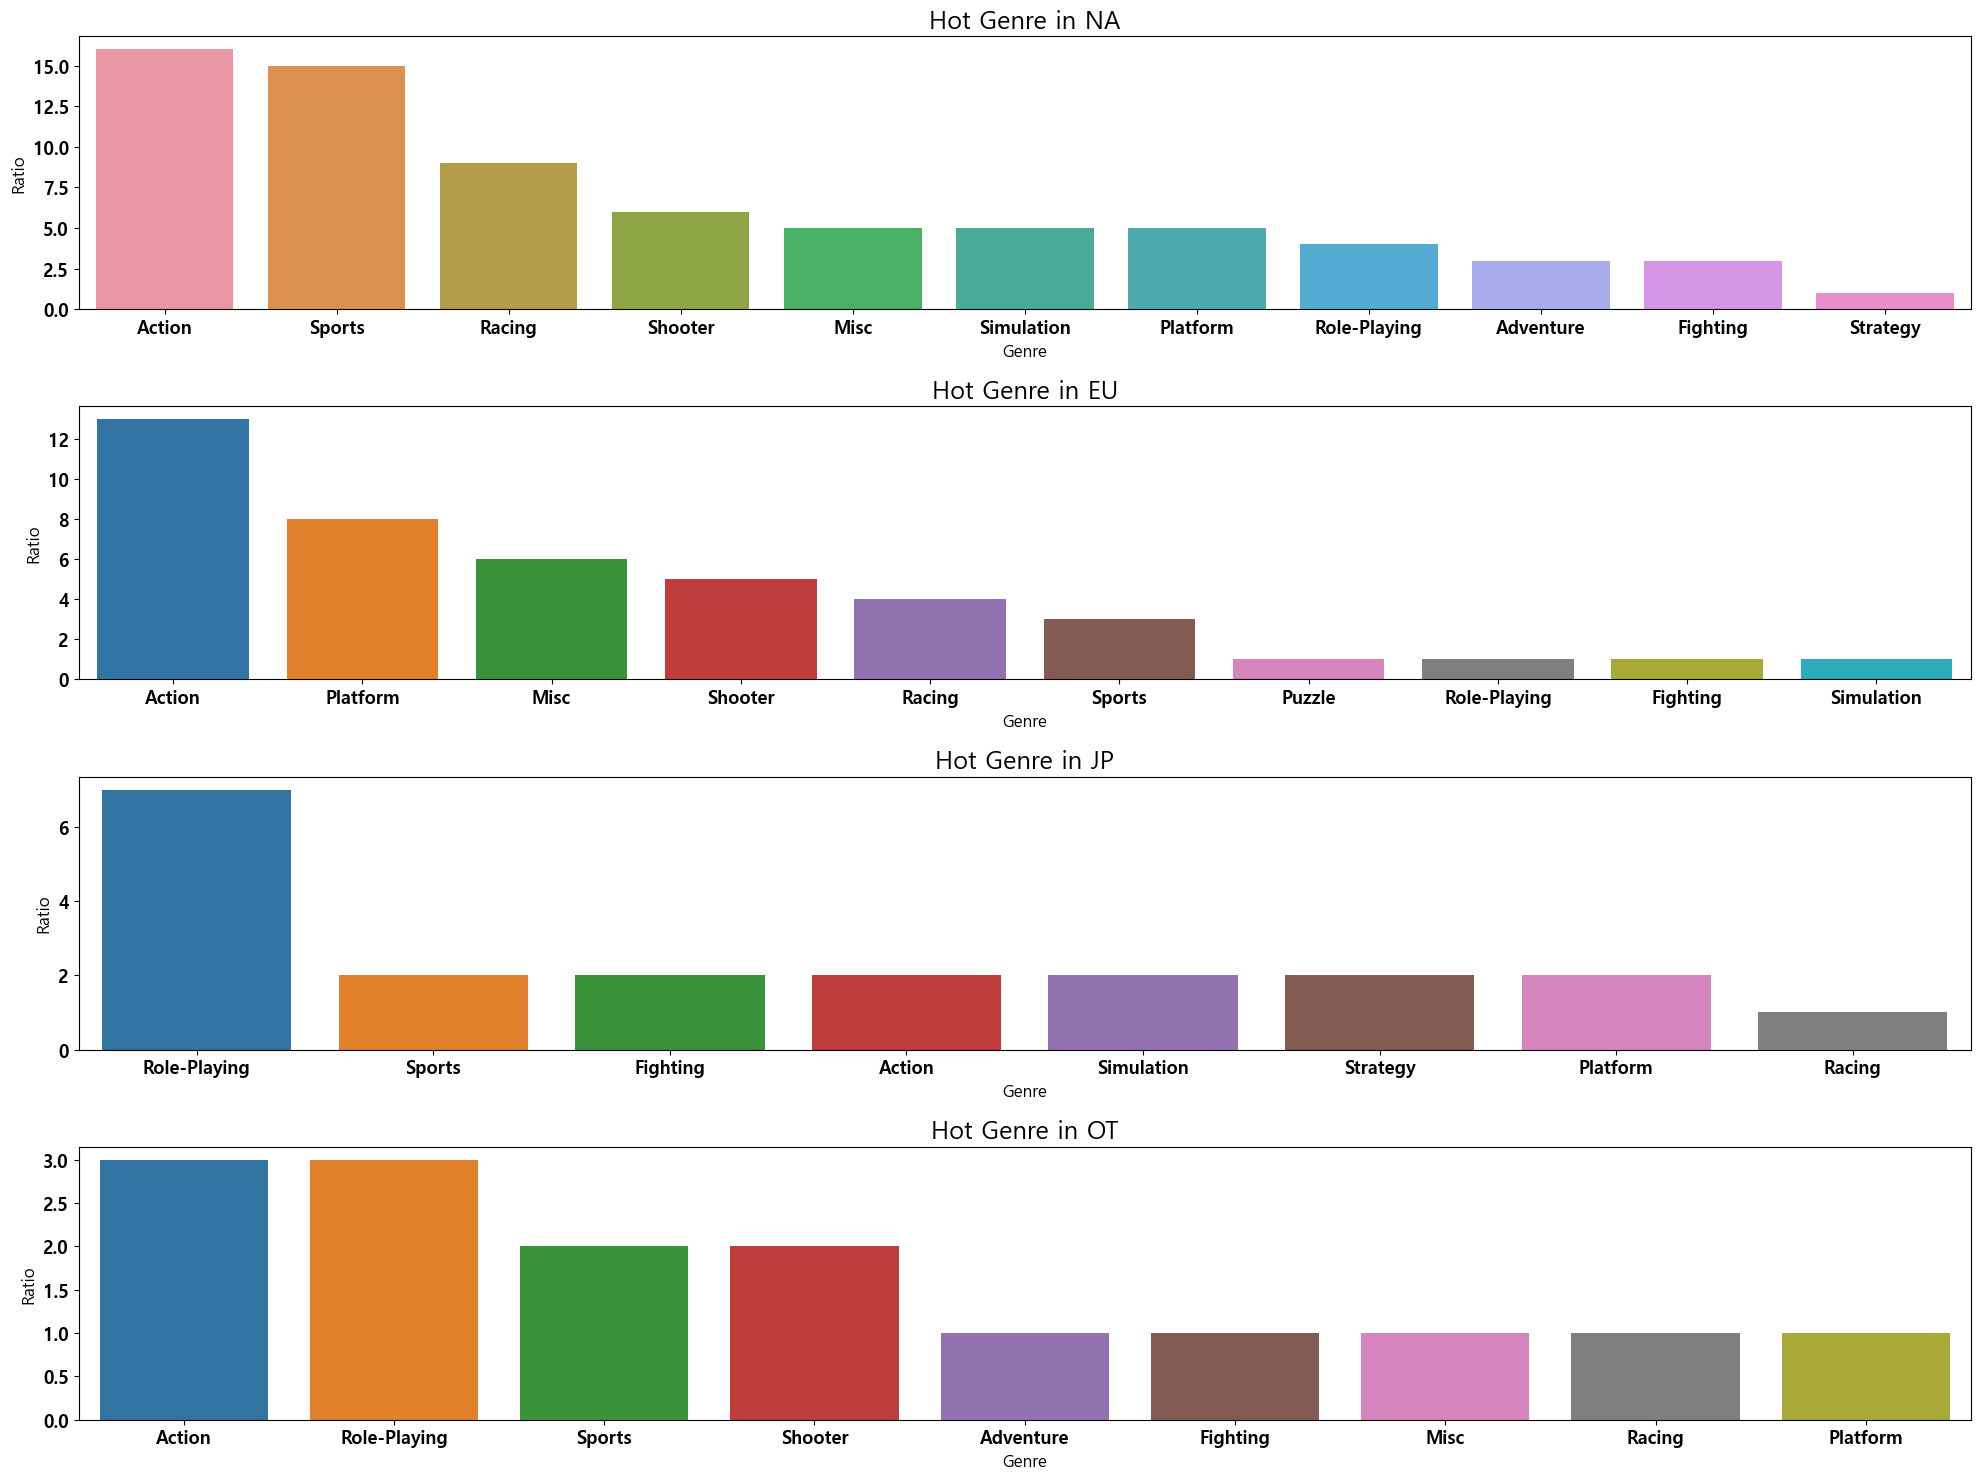

In [36]:
fig, axes = plt.subplots(nrows =4 ,ncols=1,figsize = (20,15))
sns.barplot(x = 'Genre',y = 'Ratio', data = NA_Genre , ax=axes[0]).set(title = 'Hot Genre in NA')
sns.barplot(x = 'Genre',y = 'Ratio', data = EU_Genre , ax=axes[1]).set(title = 'Hot Genre in EU')
sns.barplot(x = 'Genre',y = 'Ratio', data = JP_Genre , ax=axes[2]).set(title = 'Hot Genre in JP')
sns.barplot(x = 'Genre',y = 'Ratio', data = OT_Genre , ax=axes[3]).set(title = 'Hot Genre in OT')
plt.tight_layout()

- NA 뿐만 아니라 다른애들은?

In [37]:
df2[df2.Genre =='Simulation'].sort_values(by='Year',ascending = False
                                         )

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Generation,Where,cluster
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29,2010,NA_Sales,0
7033,Goat Simulator,XOne,2016,Simulation,Koch Media,0.00,0.01,0.00,0.00,0.01,2010,EU_Sales,0
2997,The Idolmaster: Platinum Stars,PS4,2016,Simulation,Namco Bandai Games,0.00,0.00,0.09,0.00,0.09,2010,JP_Sales,0
10827,Bus Simulator 16,PC,2016,Simulation,Astragon,0.00,0.02,0.00,0.00,0.02,2010,EU_Sales,0
10305,Winning Post 8 2016,PS4,2016,Simulation,Tecmo Koei,0.00,0.00,0.02,0.00,0.02,2010,JP_Sales,0
10368,Story of Seasons: Good Friends of the Three Vi...,3DS,2016,Simulation,Marvelous Interactive,0.00,0.00,0.19,0.00,0.19,2010,JP_Sales,0
6501,RollerCoaster Tycoon World,PC,2016,Simulation,Atari,0.00,0.02,0.00,0.00,0.02,2010,EU_Sales,0
9661,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,2010,EU_Sales,0
5656,Teddy Together,3DS,2016,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02,2010,EU_Sales,0
10631,Cities: Skylines Snowfall,PC,2016,Simulation,Paradox Development,0.00,0.01,0.00,0.00,0.01,2010,EU_Sales,0
